In [1]:
from PIL import Image, ImageDraw, ImageFont, ImageOps
import numpy as np
import matplotlib.pyplot as plt
import math
import heapq
from heapq import heappop, heappush
from time import time
from IPython.display import Image as Img

from map import Map
from draw import draw
from CBS import CBS
from Solutions import make_path
from astar import Node, distance, SearchTreePQS, compute_cost
from Constraints import Constraints

height = 15
width = 30

test_map_str_1 = '''
. . . . . . . . . . . . . . . . . . . . . # # . . . . . . .  
. . . . . . . . . . . . . . . . . . . . . # # . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . # # . . . . . . . 
. . . # # . . . . . . . . . . . . . . . . # # . . . . . . . 
. . . # # . . . . . . . . # # . . . . . . # # . . . . . . . 
. . . # # . . . . . . . . # # . . . . . . # # # # # . . . . 
. . . # # . . . . . . . . # # . . . . . . # # # # # . . . . 
. . . # # . . . . . . . . # # . . . . . . . . . . . . . . . 
. . . # # . . . . . . . . # # . . . . . . . . . . . . . . . 
. . . # # . . . . . . . . # # . . . . . . . . . . . . . . . 
. . . # # . . . . . . . . # # . . . . . . . . . . . . . . . 
. . . # # . . . . . . . . # # . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . # # . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . # # . . . . . . . . . . . . . . .
. . . . . . . . . . . . . # # . . . . . . . . . . . . . . .
'''

test_map = Map()
test_map.read_from_string(test_map_str_1, width, height) 

In [8]:
def astar(grid_map, start_i, start_j, goal_i, goal_j, agent_index, constraints, heuristic_func = None, search_tree = None, all_path=False):
    ast = search_tree()
    steps = 0
    nodes_created = 0
    CLOSED = None
    all_paths = []
    current_point = [start_i, start_j]
    current_node = Node(current_point[0], current_point[1])
    nodes_created += 1
    ast.add_to_open(current_node)
    open_is_empty = False
    max_constraint_path = 0
    find_goal_node = False
#     constraints.add_constraint(0, 20, Node(10, 10))
    goal_node_time = math.inf
    while not open_is_empty and current_node.f <= goal_node_time:
        
        steps += 1
        # current_node = ast.get_best_node_from_open()
        ast.add_to_closed(current_node)
        neighbors = grid_map.get_neighbors(current_node.i, current_node.j)
        # print("NEIGHBORS ", neighbors)
        for point in neighbors:
            nodes_created += 1
            new_node = Node(point[0], point[1],g=current_node.g + compute_cost(point[0], point[1], current_node.i, current_node.j) ,h=heuristic_func(goal_i, goal_j, point[0], point[1]),parent= current_node)
            in_contraints = False
            # print("NEW NODE TIME", new_node.time)
#             for node in constraints.get_constraints(agent_index, new_node.time):
#                 if node.i == new_node.i and node.j == new_node.j:
#                     in_contraints = True
#                     break
            if ast.was_expanded(new_node) or in_contraints:
                # print("PASS")
                pass
            else:
                if new_node.i == goal_i and new_node.j == goal_j and new_node.time > max_constraint_path and new_node.time <= goal_node_time:
#                     if not find_goal_node:
#                         goal_node_time = new_node.time
#                         find_goal_node = True
                    goal_node_time = new_node.time
                    print(goal_node_time)
                    end = new_node
                    if all_path:
                        all_paths.append(new_node)
                    else:
                        find = True
                        return find, end, steps
                ast.add_to_open(new_node)
        # print("OPEN ", ast.OPEN)
        if ast.open_is_empty():
            open_is_empty = True
            continue
        current_node = ast.get_best_node_from_open()
        print("get_best_node_from_open ", current_node)
#         print("OPEN ", ast.OPEN)
        if ast.was_expanded(current_node):
            # print("BREAK")
            break
        
    if all_path:
#         print(ast.OPEN)
        return True, all_paths, steps
    # print(current_node)
    CLOSED = ast.CLOSED
    return False, False, steps

In [9]:
starts_points = [[0, 0]]
goals_points = [[0, 28]]

In [10]:
res, node, step = astar(test_map, *starts_points[0], *goals_points[0], 0, Constraints(), distance, SearchTreePQS, True)

get_best_node_from_open  0 1 1.0
get_best_node_from_open  0 2 2.0
get_best_node_from_open  0 3 3.0
get_best_node_from_open  0 4 4.0
get_best_node_from_open  0 5 5.0
get_best_node_from_open  0 6 6.0
get_best_node_from_open  0 7 7.0
get_best_node_from_open  0 8 8.0
get_best_node_from_open  0 9 9.0
get_best_node_from_open  0 10 10.0
get_best_node_from_open  0 11 11.0
get_best_node_from_open  0 12 12.0
get_best_node_from_open  0 13 13.0
get_best_node_from_open  0 14 14.0
get_best_node_from_open  0 15 15.0
get_best_node_from_open  0 16 16.0
get_best_node_from_open  0 17 17.0
get_best_node_from_open  0 18 18.0
get_best_node_from_open  0 19 19.0
get_best_node_from_open  0 20 20.0
get_best_node_from_open  1 1 1.4142135623730951
get_best_node_from_open  1 2 2.414213562373095
get_best_node_from_open  1 2 2.414213562373095
get_best_node_from_open  0 2 2.8284271247461903
get_best_node_from_open  1 3 3.414213562373095
get_best_node_from_open  1 3 3.414213562373095
get_best_node_from_open  1 3 3.414

get_best_node_from_open  0 17 17.82842712474619
get_best_node_from_open  0 17 17.82842712474619
get_best_node_from_open  0 17 17.82842712474619
get_best_node_from_open  0 17 17.82842712474619
get_best_node_from_open  0 17 17.82842712474619
get_best_node_from_open  0 17 17.82842712474619
get_best_node_from_open  0 17 17.82842712474619
get_best_node_from_open  0 17 17.82842712474619
get_best_node_from_open  0 17 17.82842712474619
get_best_node_from_open  0 17 17.82842712474619
get_best_node_from_open  0 17 17.82842712474619
get_best_node_from_open  0 17 17.82842712474619
get_best_node_from_open  0 17 17.82842712474619
get_best_node_from_open  0 17 17.82842712474619
get_best_node_from_open  0 17 17.82842712474619
get_best_node_from_open  0 17 17.82842712474619
get_best_node_from_open  0 17 17.82842712474619
get_best_node_from_open  0 17 17.82842712474619
get_best_node_from_open  0 17 17.82842712474619
get_best_node_from_open  0 17 17.82842712474619
get_best_node_from_open  0 17 17.8284271

get_best_node_from_open  0 20 20.82842712474619
get_best_node_from_open  0 20 20.82842712474619
get_best_node_from_open  0 20 20.82842712474619
get_best_node_from_open  0 20 20.82842712474619
get_best_node_from_open  0 20 20.82842712474619
get_best_node_from_open  0 20 20.82842712474619
get_best_node_from_open  0 20 20.82842712474619
get_best_node_from_open  0 20 20.82842712474619
get_best_node_from_open  0 20 20.82842712474619
get_best_node_from_open  0 20 20.82842712474619
get_best_node_from_open  0 20 20.82842712474619
get_best_node_from_open  0 20 20.82842712474619
get_best_node_from_open  0 20 20.82842712474619
get_best_node_from_open  0 20 20.82842712474619
get_best_node_from_open  0 20 20.82842712474619
get_best_node_from_open  0 20 20.82842712474619
get_best_node_from_open  0 20 20.82842712474619
get_best_node_from_open  0 20 20.82842712474619
get_best_node_from_open  0 0 1
get_best_node_from_open  0 1 2.0
get_best_node_from_open  0 1 2.0
get_best_node_from_open  0 2 3.0
get_be

get_best_node_from_open  0 10 11.414213562373096
get_best_node_from_open  0 10 11.414213562373096
get_best_node_from_open  0 10 11.414213562373096
get_best_node_from_open  0 10 11.414213562373096
get_best_node_from_open  0 10 11.414213562373096
get_best_node_from_open  1 11 12.0
get_best_node_from_open  1 11 12.0
get_best_node_from_open  1 11 12.0
get_best_node_from_open  1 11 12.0
get_best_node_from_open  1 11 12.0
get_best_node_from_open  1 11 12.0
get_best_node_from_open  1 11 12.0
get_best_node_from_open  1 11 12.0
get_best_node_from_open  1 11 12.0
get_best_node_from_open  1 11 12.0
get_best_node_from_open  1 11 12.0
get_best_node_from_open  1 11 12.0
get_best_node_from_open  0 11 12.414213562373096
get_best_node_from_open  0 11 12.414213562373096
get_best_node_from_open  0 11 12.414213562373096
get_best_node_from_open  0 11 12.414213562373096
get_best_node_from_open  0 11 12.414213562373096
get_best_node_from_open  0 11 12.414213562373096
get_best_node_from_open  0 11 12.41421356

get_best_node_from_open  1 15 16.0
get_best_node_from_open  1 15 16.0
get_best_node_from_open  1 15 16.0
get_best_node_from_open  1 15 16.0
get_best_node_from_open  1 15 16.0
get_best_node_from_open  0 15 16.414213562373096
get_best_node_from_open  0 15 16.414213562373096
get_best_node_from_open  0 15 16.414213562373096
get_best_node_from_open  0 15 16.414213562373096
get_best_node_from_open  0 15 16.414213562373096
get_best_node_from_open  0 15 16.414213562373096
get_best_node_from_open  0 15 16.414213562373096
get_best_node_from_open  0 15 16.414213562373096
get_best_node_from_open  0 15 16.414213562373096
get_best_node_from_open  0 15 16.414213562373096
get_best_node_from_open  0 15 16.414213562373096
get_best_node_from_open  0 15 16.414213562373096
get_best_node_from_open  0 15 16.414213562373096
get_best_node_from_open  0 15 16.414213562373096
get_best_node_from_open  0 15 16.414213562373096
get_best_node_from_open  0 15 16.414213562373096
get_best_node_from_open  0 15 16.41421356

get_best_node_from_open  0 17 18.414213562373096
get_best_node_from_open  0 17 18.414213562373096
get_best_node_from_open  0 17 18.414213562373096
get_best_node_from_open  0 17 18.414213562373096
get_best_node_from_open  0 17 18.414213562373096
get_best_node_from_open  0 17 18.414213562373096
get_best_node_from_open  0 17 18.414213562373096
get_best_node_from_open  0 17 18.414213562373096
get_best_node_from_open  0 17 18.414213562373096
get_best_node_from_open  0 17 18.414213562373096
get_best_node_from_open  0 17 18.414213562373096
get_best_node_from_open  0 17 18.414213562373096
get_best_node_from_open  0 17 18.414213562373096
get_best_node_from_open  0 17 18.414213562373096
get_best_node_from_open  0 17 18.414213562373096
get_best_node_from_open  0 17 18.414213562373096
get_best_node_from_open  0 17 18.414213562373096
get_best_node_from_open  0 17 18.414213562373096
get_best_node_from_open  0 17 18.414213562373096
get_best_node_from_open  0 17 18.414213562373096
get_best_node_from_o

get_best_node_from_open  0 19 20.414213562373096
get_best_node_from_open  0 19 20.414213562373096
get_best_node_from_open  0 19 20.414213562373096
get_best_node_from_open  0 19 20.414213562373096
get_best_node_from_open  0 19 20.414213562373096
get_best_node_from_open  0 19 20.414213562373096
get_best_node_from_open  0 19 20.414213562373096
get_best_node_from_open  0 19 20.414213562373096
get_best_node_from_open  0 19 20.414213562373096
get_best_node_from_open  0 19 20.414213562373096
get_best_node_from_open  0 19 20.414213562373096
get_best_node_from_open  0 19 20.414213562373096
get_best_node_from_open  0 19 20.414213562373096
get_best_node_from_open  0 19 20.414213562373096
get_best_node_from_open  0 19 20.414213562373096
get_best_node_from_open  0 19 20.414213562373096
get_best_node_from_open  0 19 20.414213562373096
get_best_node_from_open  0 19 20.414213562373096
get_best_node_from_open  0 19 20.414213562373096
get_best_node_from_open  0 19 20.414213562373096
get_best_node_from_o

get_best_node_from_open  0 9 10.65685424949238
get_best_node_from_open  0 9 10.65685424949238
get_best_node_from_open  0 9 10.65685424949238
get_best_node_from_open  0 9 10.65685424949238
get_best_node_from_open  0 9 10.65685424949238
get_best_node_from_open  0 9 10.65685424949238
get_best_node_from_open  0 9 10.65685424949238
get_best_node_from_open  0 9 10.65685424949238
get_best_node_from_open  0 9 10.65685424949238
get_best_node_from_open  0 9 10.65685424949238
get_best_node_from_open  0 9 10.65685424949238
get_best_node_from_open  0 9 10.65685424949238
get_best_node_from_open  0 9 10.65685424949238
get_best_node_from_open  0 9 10.65685424949238
get_best_node_from_open  0 9 10.65685424949238
get_best_node_from_open  0 9 10.65685424949238
get_best_node_from_open  0 9 10.65685424949238
get_best_node_from_open  0 9 10.65685424949238
get_best_node_from_open  0 9 10.65685424949238
get_best_node_from_open  0 9 10.65685424949238
get_best_node_from_open  0 9 10.65685424949238
get_best_node

get_best_node_from_open  1 15 16.242640687119284
get_best_node_from_open  1 15 16.242640687119284
get_best_node_from_open  1 15 16.242640687119284
get_best_node_from_open  1 15 16.242640687119284
get_best_node_from_open  1 15 16.242640687119284
get_best_node_from_open  1 15 16.242640687119284
get_best_node_from_open  1 15 16.242640687119284
get_best_node_from_open  1 15 16.242640687119284
get_best_node_from_open  1 15 16.242640687119284
get_best_node_from_open  1 15 16.242640687119284
get_best_node_from_open  1 15 16.242640687119284
get_best_node_from_open  1 15 16.242640687119284
get_best_node_from_open  1 15 16.242640687119284
get_best_node_from_open  1 15 16.242640687119284
get_best_node_from_open  1 15 16.242640687119284
get_best_node_from_open  1 15 16.242640687119284
get_best_node_from_open  1 15 16.242640687119284
get_best_node_from_open  1 15 16.242640687119284
get_best_node_from_open  1 15 16.242640687119284
get_best_node_from_open  0 15 16.65685424949238
get_best_node_from_op

get_best_node_from_open  0 17 18.65685424949238
get_best_node_from_open  0 17 18.65685424949238
get_best_node_from_open  0 17 18.65685424949238
get_best_node_from_open  0 17 18.65685424949238
get_best_node_from_open  0 17 18.65685424949238
get_best_node_from_open  0 17 18.65685424949238
get_best_node_from_open  0 17 18.65685424949238
get_best_node_from_open  0 17 18.65685424949238
get_best_node_from_open  0 17 18.65685424949238
get_best_node_from_open  0 17 18.65685424949238
get_best_node_from_open  0 17 18.65685424949238
get_best_node_from_open  0 17 18.65685424949238
get_best_node_from_open  0 17 18.65685424949238
get_best_node_from_open  0 17 18.65685424949238
get_best_node_from_open  0 17 18.65685424949238
get_best_node_from_open  0 17 18.65685424949238
get_best_node_from_open  0 17 18.65685424949238
get_best_node_from_open  0 17 18.65685424949238
get_best_node_from_open  0 17 18.65685424949238
get_best_node_from_open  0 17 18.65685424949238
get_best_node_from_open  0 17 18.6568542

get_best_node_from_open  1 19 20.242640687119284
get_best_node_from_open  1 19 20.242640687119284
get_best_node_from_open  1 19 20.242640687119284
get_best_node_from_open  1 19 20.242640687119284
get_best_node_from_open  1 19 20.242640687119284
get_best_node_from_open  1 19 20.242640687119284
get_best_node_from_open  1 19 20.242640687119284
get_best_node_from_open  1 19 20.242640687119284
get_best_node_from_open  1 19 20.242640687119284
get_best_node_from_open  1 19 20.242640687119284
get_best_node_from_open  1 19 20.242640687119284
get_best_node_from_open  1 19 20.242640687119284
get_best_node_from_open  1 19 20.242640687119284
get_best_node_from_open  1 19 20.242640687119284
get_best_node_from_open  1 19 20.242640687119284
get_best_node_from_open  1 19 20.242640687119284
get_best_node_from_open  1 19 20.242640687119284
get_best_node_from_open  1 19 20.242640687119284
get_best_node_from_open  1 19 20.242640687119284
get_best_node_from_open  1 19 20.242640687119284
get_best_node_from_o

get_best_node_from_open  0 20 21.65685424949238
get_best_node_from_open  0 20 21.65685424949238
get_best_node_from_open  0 20 21.65685424949238
get_best_node_from_open  0 20 21.65685424949238
get_best_node_from_open  0 20 21.65685424949238
get_best_node_from_open  0 20 21.65685424949238
get_best_node_from_open  0 20 21.65685424949238
get_best_node_from_open  0 20 21.65685424949238
get_best_node_from_open  0 20 21.65685424949238
get_best_node_from_open  0 20 21.65685424949238
get_best_node_from_open  0 20 21.65685424949238
get_best_node_from_open  0 20 21.65685424949238
get_best_node_from_open  0 20 21.65685424949238
get_best_node_from_open  0 20 21.65685424949238
get_best_node_from_open  0 20 21.65685424949238
get_best_node_from_open  0 20 21.65685424949238
get_best_node_from_open  0 20 21.65685424949238
get_best_node_from_open  0 20 21.65685424949238
get_best_node_from_open  0 20 21.65685424949238
get_best_node_from_open  0 20 21.65685424949238
get_best_node_from_open  0 20 21.6568542

get_best_node_from_open  0 9 10.65685424949238
get_best_node_from_open  0 9 10.65685424949238
get_best_node_from_open  0 9 10.65685424949238
get_best_node_from_open  0 9 10.65685424949238
get_best_node_from_open  1 10 11.242640687119284
get_best_node_from_open  0 10 11.65685424949238
get_best_node_from_open  0 10 11.65685424949238
get_best_node_from_open  0 10 11.65685424949238
get_best_node_from_open  0 10 11.65685424949238
get_best_node_from_open  0 10 11.65685424949238
get_best_node_from_open  1 11 12.242640687119284
get_best_node_from_open  0 11 12.65685424949238
get_best_node_from_open  0 11 12.65685424949238
get_best_node_from_open  0 11 12.65685424949238
get_best_node_from_open  0 11 12.65685424949238
get_best_node_from_open  0 11 12.65685424949238
get_best_node_from_open  0 11 12.65685424949238
get_best_node_from_open  1 12 13.242640687119284
get_best_node_from_open  0 12 13.65685424949238
get_best_node_from_open  0 12 13.65685424949238
get_best_node_from_open  0 12 13.65685424

get_best_node_from_open  0 14 15.65685424949238
get_best_node_from_open  0 14 15.65685424949238
get_best_node_from_open  0 14 15.65685424949238
get_best_node_from_open  0 14 15.65685424949238
get_best_node_from_open  0 14 15.65685424949238
get_best_node_from_open  0 14 15.65685424949238
get_best_node_from_open  1 15 16.242640687119284
get_best_node_from_open  0 15 16.65685424949238
get_best_node_from_open  0 15 16.65685424949238
get_best_node_from_open  0 15 16.65685424949238
get_best_node_from_open  0 15 16.65685424949238
get_best_node_from_open  0 15 16.65685424949238
get_best_node_from_open  0 15 16.65685424949238
get_best_node_from_open  0 15 16.65685424949238
get_best_node_from_open  0 15 16.65685424949238
get_best_node_from_open  0 15 16.65685424949238
get_best_node_from_open  0 15 16.65685424949238
get_best_node_from_open  1 16 17.242640687119284
get_best_node_from_open  0 16 17.65685424949238
get_best_node_from_open  0 16 17.65685424949238
get_best_node_from_open  0 16 17.65685

get_best_node_from_open  0 17 18.65685424949238
get_best_node_from_open  0 17 18.65685424949238
get_best_node_from_open  1 18 19.242640687119284
get_best_node_from_open  0 18 19.65685424949238
get_best_node_from_open  0 18 19.65685424949238
get_best_node_from_open  0 18 19.65685424949238
get_best_node_from_open  0 18 19.65685424949238
get_best_node_from_open  0 18 19.65685424949238
get_best_node_from_open  0 18 19.65685424949238
get_best_node_from_open  0 18 19.65685424949238
get_best_node_from_open  0 18 19.65685424949238
get_best_node_from_open  0 18 19.65685424949238
get_best_node_from_open  0 18 19.65685424949238
get_best_node_from_open  0 18 19.65685424949238
get_best_node_from_open  0 18 19.65685424949238
get_best_node_from_open  1 19 20.242640687119284
get_best_node_from_open  0 19 20.65685424949238
get_best_node_from_open  0 19 20.65685424949238
get_best_node_from_open  0 19 20.65685424949238
get_best_node_from_open  0 19 20.65685424949238
get_best_node_from_open  0 19 20.65685

get_best_node_from_open  0 20 21.65685424949238
get_best_node_from_open  1 5 6.242640687119286
get_best_node_from_open  0 6 7.656854249492381
get_best_node_from_open  0 7 8.65685424949238
get_best_node_from_open  0 8 9.65685424949238
get_best_node_from_open  0 9 10.65685424949238
get_best_node_from_open  0 10 11.65685424949238
get_best_node_from_open  0 11 12.65685424949238
get_best_node_from_open  0 12 13.65685424949238
get_best_node_from_open  0 13 14.65685424949238
get_best_node_from_open  0 14 15.65685424949238
get_best_node_from_open  0 15 16.65685424949238
get_best_node_from_open  0 16 17.65685424949238
get_best_node_from_open  0 17 18.65685424949238
get_best_node_from_open  0 18 19.65685424949238
get_best_node_from_open  0 19 20.65685424949238
get_best_node_from_open  0 20 21.65685424949238
get_best_node_from_open  1 5 6.242640687119286
get_best_node_from_open  0 6 7.656854249492381
get_best_node_from_open  0 7 8.65685424949238
get_best_node_from_open  0 8 9.65685424949238
get_b

get_best_node_from_open  1 10 11.242640687119286
get_best_node_from_open  1 10 11.242640687119286
get_best_node_from_open  1 10 11.242640687119286
get_best_node_from_open  1 10 11.242640687119286
get_best_node_from_open  1 10 11.242640687119286
get_best_node_from_open  1 10 11.242640687119286
get_best_node_from_open  1 10 11.242640687119286
get_best_node_from_open  1 10 11.242640687119286
get_best_node_from_open  1 10 11.242640687119286
get_best_node_from_open  1 10 11.242640687119286
get_best_node_from_open  1 10 11.242640687119286
get_best_node_from_open  1 10 11.242640687119286
get_best_node_from_open  1 10 11.242640687119286
get_best_node_from_open  1 10 11.242640687119286
get_best_node_from_open  1 10 11.242640687119286
get_best_node_from_open  1 10 11.242640687119286
get_best_node_from_open  1 10 11.242640687119286
get_best_node_from_open  1 10 11.242640687119286
get_best_node_from_open  1 10 11.242640687119286
get_best_node_from_open  1 10 11.242640687119286
get_best_node_from_o

get_best_node_from_open  0 10 11.656854249492381
get_best_node_from_open  0 10 11.656854249492381
get_best_node_from_open  0 10 11.656854249492381
get_best_node_from_open  0 10 11.656854249492381
get_best_node_from_open  0 10 11.656854249492381
get_best_node_from_open  0 10 11.656854249492381
get_best_node_from_open  0 10 11.656854249492381
get_best_node_from_open  0 10 11.656854249492381
get_best_node_from_open  0 10 11.656854249492381
get_best_node_from_open  0 10 11.656854249492381
get_best_node_from_open  0 10 11.656854249492381
get_best_node_from_open  0 10 11.656854249492381
get_best_node_from_open  0 10 11.656854249492381
get_best_node_from_open  0 10 11.656854249492381
get_best_node_from_open  0 10 11.656854249492381
get_best_node_from_open  0 10 11.656854249492381
get_best_node_from_open  0 10 11.656854249492381
get_best_node_from_open  0 10 11.656854249492381
get_best_node_from_open  0 10 11.656854249492381
get_best_node_from_open  0 10 11.656854249492381
get_best_node_from_o

get_best_node_from_open  0 11 12.656854249492381
get_best_node_from_open  0 11 12.656854249492381
get_best_node_from_open  0 11 12.656854249492381
get_best_node_from_open  0 11 12.656854249492381
get_best_node_from_open  0 11 12.656854249492381
get_best_node_from_open  0 11 12.656854249492381
get_best_node_from_open  0 11 12.656854249492381
get_best_node_from_open  0 11 12.656854249492381
get_best_node_from_open  0 11 12.656854249492381
get_best_node_from_open  0 11 12.656854249492381
get_best_node_from_open  0 11 12.656854249492381
get_best_node_from_open  0 11 12.656854249492381
get_best_node_from_open  0 11 12.656854249492381
get_best_node_from_open  0 11 12.656854249492381
get_best_node_from_open  0 11 12.656854249492381
get_best_node_from_open  0 11 12.656854249492381
get_best_node_from_open  0 11 12.656854249492381
get_best_node_from_open  0 11 12.656854249492381
get_best_node_from_open  0 11 12.656854249492381
get_best_node_from_open  0 11 12.656854249492381
get_best_node_from_o

get_best_node_from_open  0 19 20.65685424949238
get_best_node_from_open  0 19 20.65685424949238
get_best_node_from_open  0 19 20.65685424949238
get_best_node_from_open  0 19 20.65685424949238
get_best_node_from_open  1 20 21.242640687119284
get_best_node_from_open  1 20 21.242640687119284
get_best_node_from_open  0 20 21.65685424949238
get_best_node_from_open  0 20 21.65685424949238
get_best_node_from_open  0 20 21.65685424949238
get_best_node_from_open  0 20 21.65685424949238
get_best_node_from_open  0 20 21.65685424949238
get_best_node_from_open  0 20 21.65685424949238
get_best_node_from_open  0 20 21.65685424949238
get_best_node_from_open  0 20 21.65685424949238
get_best_node_from_open  0 20 21.65685424949238
get_best_node_from_open  2 12 12.82842712474619
get_best_node_from_open  2 13 13.82842712474619
get_best_node_from_open  2 14 14.82842712474619
get_best_node_from_open  2 15 15.82842712474619
get_best_node_from_open  1 15 16.242640687119284
get_best_node_from_open  1 16 17.2426

get_best_node_from_open  1 12 13.242640687119286
get_best_node_from_open  1 12 13.242640687119286
get_best_node_from_open  1 12 13.242640687119286
get_best_node_from_open  1 12 13.242640687119286
get_best_node_from_open  1 12 13.242640687119286
get_best_node_from_open  1 12 13.242640687119286
get_best_node_from_open  1 12 13.242640687119286
get_best_node_from_open  1 12 13.242640687119286
get_best_node_from_open  1 12 13.242640687119286
get_best_node_from_open  1 12 13.242640687119286
get_best_node_from_open  1 12 13.242640687119286
get_best_node_from_open  1 12 13.242640687119286
get_best_node_from_open  1 12 13.242640687119286
get_best_node_from_open  1 12 13.242640687119286
get_best_node_from_open  1 12 13.242640687119286
get_best_node_from_open  1 12 13.242640687119286
get_best_node_from_open  1 12 13.242640687119286
get_best_node_from_open  1 12 13.242640687119286
get_best_node_from_open  1 12 13.242640687119286
get_best_node_from_open  1 12 13.242640687119286
get_best_node_from_o

get_best_node_from_open  0 12 13.656854249492381
get_best_node_from_open  0 12 13.656854249492381
get_best_node_from_open  0 12 13.656854249492381
get_best_node_from_open  0 12 13.656854249492381
get_best_node_from_open  0 12 13.656854249492381
get_best_node_from_open  0 12 13.656854249492381
get_best_node_from_open  0 12 13.656854249492381
get_best_node_from_open  0 12 13.656854249492381
get_best_node_from_open  0 12 13.656854249492381
get_best_node_from_open  0 12 13.656854249492381
get_best_node_from_open  0 12 13.656854249492381
get_best_node_from_open  0 12 13.656854249492381
get_best_node_from_open  0 12 13.656854249492381
get_best_node_from_open  0 12 13.656854249492381
get_best_node_from_open  0 12 13.656854249492381
get_best_node_from_open  0 12 13.656854249492381
get_best_node_from_open  0 12 13.656854249492381
get_best_node_from_open  0 12 13.656854249492381
get_best_node_from_open  0 12 13.656854249492381
get_best_node_from_open  0 12 13.656854249492381
get_best_node_from_o

get_best_node_from_open  1 13 14.242640687119286
get_best_node_from_open  1 13 14.242640687119286
get_best_node_from_open  1 13 14.242640687119286
get_best_node_from_open  1 13 14.242640687119286
get_best_node_from_open  1 13 14.242640687119286
get_best_node_from_open  1 13 14.242640687119286
get_best_node_from_open  1 13 14.242640687119286
get_best_node_from_open  1 13 14.242640687119286
get_best_node_from_open  1 13 14.242640687119286
get_best_node_from_open  1 13 14.242640687119286
get_best_node_from_open  1 13 14.242640687119286
get_best_node_from_open  1 13 14.242640687119286
get_best_node_from_open  1 13 14.242640687119286
get_best_node_from_open  1 13 14.242640687119286
get_best_node_from_open  1 13 14.242640687119286
get_best_node_from_open  1 13 14.242640687119286
get_best_node_from_open  1 13 14.242640687119286
get_best_node_from_open  1 13 14.242640687119286
get_best_node_from_open  1 13 14.242640687119286
get_best_node_from_open  1 13 14.242640687119286
get_best_node_from_o

get_best_node_from_open  0 13 14.656854249492381
get_best_node_from_open  0 13 14.656854249492381
get_best_node_from_open  0 13 14.656854249492381
get_best_node_from_open  0 13 14.656854249492381
get_best_node_from_open  0 13 14.656854249492381
get_best_node_from_open  0 13 14.656854249492381
get_best_node_from_open  0 13 14.656854249492381
get_best_node_from_open  0 13 14.656854249492381
get_best_node_from_open  0 13 14.656854249492381
get_best_node_from_open  0 13 14.656854249492381
get_best_node_from_open  0 13 14.656854249492381
get_best_node_from_open  0 13 14.656854249492381
get_best_node_from_open  0 13 14.656854249492381
get_best_node_from_open  0 13 14.656854249492381
get_best_node_from_open  0 13 14.656854249492381
get_best_node_from_open  0 13 14.656854249492381
get_best_node_from_open  0 13 14.656854249492381
get_best_node_from_open  0 13 14.656854249492381
get_best_node_from_open  0 13 14.656854249492381
get_best_node_from_open  0 13 14.656854249492381
get_best_node_from_o

get_best_node_from_open  0 13 14.656854249492381
get_best_node_from_open  0 13 14.656854249492381
get_best_node_from_open  0 13 14.656854249492381
get_best_node_from_open  0 13 14.656854249492381
get_best_node_from_open  0 13 14.656854249492381
get_best_node_from_open  0 13 14.656854249492381
get_best_node_from_open  0 13 14.656854249492381
get_best_node_from_open  0 13 14.656854249492381
get_best_node_from_open  0 13 14.656854249492381
get_best_node_from_open  0 13 14.656854249492381
get_best_node_from_open  0 13 14.656854249492381
get_best_node_from_open  0 13 14.656854249492381
get_best_node_from_open  0 13 14.656854249492381
get_best_node_from_open  0 13 14.656854249492381
get_best_node_from_open  0 13 14.656854249492381
get_best_node_from_open  0 13 14.656854249492381
get_best_node_from_open  0 13 14.656854249492381
get_best_node_from_open  0 13 14.656854249492381
get_best_node_from_open  0 13 14.656854249492381
get_best_node_from_open  0 13 14.656854249492381
get_best_node_from_o

get_best_node_from_open  0 18 19.65685424949238
get_best_node_from_open  0 18 19.65685424949238
get_best_node_from_open  0 18 19.65685424949238
get_best_node_from_open  0 18 19.65685424949238
get_best_node_from_open  1 19 20.242640687119284
get_best_node_from_open  0 19 20.65685424949238
get_best_node_from_open  0 19 20.65685424949238
get_best_node_from_open  0 19 20.65685424949238
get_best_node_from_open  0 19 20.65685424949238
get_best_node_from_open  0 19 20.65685424949238
get_best_node_from_open  1 20 21.242640687119284
get_best_node_from_open  0 20 21.65685424949238
get_best_node_from_open  0 20 21.65685424949238
get_best_node_from_open  0 20 21.65685424949238
get_best_node_from_open  0 20 21.65685424949238
get_best_node_from_open  0 20 21.65685424949238
get_best_node_from_open  0 20 21.65685424949238
get_best_node_from_open  1 14 15.242640687119286
get_best_node_from_open  1 15 16.242640687119284
get_best_node_from_open  0 15 16.65685424949238
get_best_node_from_open  1 16 17.242

get_best_node_from_open  0 17 18.65685424949238
get_best_node_from_open  0 17 18.65685424949238
get_best_node_from_open  1 18 19.242640687119284
get_best_node_from_open  0 18 19.65685424949238
get_best_node_from_open  0 18 19.65685424949238
get_best_node_from_open  0 18 19.65685424949238
get_best_node_from_open  0 18 19.65685424949238
get_best_node_from_open  1 19 20.242640687119284
get_best_node_from_open  0 19 20.65685424949238
get_best_node_from_open  0 19 20.65685424949238
get_best_node_from_open  0 19 20.65685424949238
get_best_node_from_open  0 19 20.65685424949238
get_best_node_from_open  0 19 20.65685424949238
get_best_node_from_open  1 20 21.242640687119284
get_best_node_from_open  0 20 21.65685424949238
get_best_node_from_open  0 20 21.65685424949238
get_best_node_from_open  0 20 21.65685424949238
get_best_node_from_open  0 20 21.65685424949238
get_best_node_from_open  0 20 21.65685424949238
get_best_node_from_open  0 20 21.65685424949238
get_best_node_from_open  1 14 15.2426

get_best_node_from_open  1 16 17.242640687119284
get_best_node_from_open  0 16 17.65685424949238
get_best_node_from_open  0 16 17.65685424949238
get_best_node_from_open  1 17 18.242640687119284
get_best_node_from_open  0 17 18.65685424949238
get_best_node_from_open  0 17 18.65685424949238
get_best_node_from_open  0 17 18.65685424949238
get_best_node_from_open  1 18 19.242640687119284
get_best_node_from_open  0 18 19.65685424949238
get_best_node_from_open  0 18 19.65685424949238
get_best_node_from_open  0 18 19.65685424949238
get_best_node_from_open  0 18 19.65685424949238
get_best_node_from_open  1 19 20.242640687119284
get_best_node_from_open  0 19 20.65685424949238
get_best_node_from_open  0 19 20.65685424949238
get_best_node_from_open  0 19 20.65685424949238
get_best_node_from_open  0 19 20.65685424949238
get_best_node_from_open  0 19 20.65685424949238
get_best_node_from_open  1 20 21.242640687119284
get_best_node_from_open  0 20 21.65685424949238
get_best_node_from_open  0 20 21.65

get_best_node_from_open  0 20 21.65685424949238
get_best_node_from_open  0 20 21.65685424949238
get_best_node_from_open  0 20 21.65685424949238
get_best_node_from_open  0 20 21.65685424949238
get_best_node_from_open  1 14 15.242640687119286
get_best_node_from_open  1 15 16.242640687119284
get_best_node_from_open  0 15 16.65685424949238
get_best_node_from_open  1 16 17.242640687119284
get_best_node_from_open  0 16 17.65685424949238
get_best_node_from_open  0 16 17.65685424949238
get_best_node_from_open  1 17 18.242640687119284
get_best_node_from_open  0 17 18.65685424949238
get_best_node_from_open  0 17 18.65685424949238
get_best_node_from_open  0 17 18.65685424949238
get_best_node_from_open  1 18 19.242640687119284
get_best_node_from_open  0 18 19.65685424949238
get_best_node_from_open  0 18 19.65685424949238
get_best_node_from_open  0 18 19.65685424949238
get_best_node_from_open  0 18 19.65685424949238
get_best_node_from_open  1 19 20.242640687119284
get_best_node_from_open  0 19 20.6

get_best_node_from_open  0 20 21.65685424949238
get_best_node_from_open  0 20 21.65685424949238
get_best_node_from_open  0 20 21.65685424949238
get_best_node_from_open  1 14 15.242640687119286
get_best_node_from_open  1 15 16.242640687119284
get_best_node_from_open  0 15 16.65685424949238
get_best_node_from_open  1 16 17.242640687119284
get_best_node_from_open  0 16 17.65685424949238
get_best_node_from_open  0 16 17.65685424949238
get_best_node_from_open  1 17 18.242640687119284
get_best_node_from_open  0 17 18.65685424949238
get_best_node_from_open  0 17 18.65685424949238
get_best_node_from_open  0 17 18.65685424949238
get_best_node_from_open  1 18 19.242640687119284
get_best_node_from_open  0 18 19.65685424949238
get_best_node_from_open  0 18 19.65685424949238
get_best_node_from_open  0 18 19.65685424949238
get_best_node_from_open  0 18 19.65685424949238
get_best_node_from_open  1 19 20.242640687119284
get_best_node_from_open  0 19 20.65685424949238
get_best_node_from_open  0 19 20.6

get_best_node_from_open  0 20 21.65685424949238
get_best_node_from_open  0 20 21.65685424949238
get_best_node_from_open  0 20 21.65685424949238
get_best_node_from_open  0 20 21.65685424949238
get_best_node_from_open  0 20 21.65685424949238
get_best_node_from_open  0 20 21.65685424949238
get_best_node_from_open  1 14 15.242640687119286
get_best_node_from_open  1 15 16.242640687119284
get_best_node_from_open  0 15 16.65685424949238
get_best_node_from_open  1 16 17.242640687119284
get_best_node_from_open  0 16 17.65685424949238
get_best_node_from_open  0 16 17.65685424949238
get_best_node_from_open  1 17 18.242640687119284
get_best_node_from_open  0 17 18.65685424949238
get_best_node_from_open  0 17 18.65685424949238
get_best_node_from_open  0 17 18.65685424949238
get_best_node_from_open  1 18 19.242640687119284
get_best_node_from_open  0 18 19.65685424949238
get_best_node_from_open  0 18 19.65685424949238
get_best_node_from_open  0 18 19.65685424949238
get_best_node_from_open  0 18 19.65

get_best_node_from_open  0 19 20.65685424949238
get_best_node_from_open  1 20 21.242640687119284
get_best_node_from_open  0 20 21.65685424949238
get_best_node_from_open  0 20 21.65685424949238
get_best_node_from_open  0 20 21.65685424949238
get_best_node_from_open  0 20 21.65685424949238
get_best_node_from_open  0 20 21.65685424949238
get_best_node_from_open  0 20 21.65685424949238
get_best_node_from_open  1 14 15.242640687119286
get_best_node_from_open  1 15 16.242640687119284
get_best_node_from_open  0 15 16.65685424949238
get_best_node_from_open  1 16 17.242640687119284
get_best_node_from_open  0 16 17.65685424949238
get_best_node_from_open  0 16 17.65685424949238
get_best_node_from_open  1 17 18.242640687119284
get_best_node_from_open  0 17 18.65685424949238
get_best_node_from_open  0 17 18.65685424949238
get_best_node_from_open  0 17 18.65685424949238
get_best_node_from_open  1 18 19.242640687119284
get_best_node_from_open  0 18 19.65685424949238
get_best_node_from_open  0 18 19.6

get_best_node_from_open  0 20 21.65685424949238
get_best_node_from_open  0 20 21.65685424949238
get_best_node_from_open  0 20 21.65685424949238
get_best_node_from_open  1 14 15.242640687119286
get_best_node_from_open  1 15 16.242640687119284
get_best_node_from_open  0 15 16.65685424949238
get_best_node_from_open  1 16 17.242640687119284
get_best_node_from_open  0 16 17.65685424949238
get_best_node_from_open  0 16 17.65685424949238
get_best_node_from_open  1 17 18.242640687119284
get_best_node_from_open  0 17 18.65685424949238
get_best_node_from_open  0 17 18.65685424949238
get_best_node_from_open  0 17 18.65685424949238
get_best_node_from_open  1 18 19.242640687119284
get_best_node_from_open  0 18 19.65685424949238
get_best_node_from_open  0 18 19.65685424949238
get_best_node_from_open  0 18 19.65685424949238
get_best_node_from_open  0 18 19.65685424949238
get_best_node_from_open  1 19 20.242640687119284
get_best_node_from_open  0 19 20.65685424949238
get_best_node_from_open  0 19 20.6

get_best_node_from_open  1 15 16.242640687119284
get_best_node_from_open  0 15 16.65685424949238
get_best_node_from_open  1 16 17.242640687119284
get_best_node_from_open  0 16 17.65685424949238
get_best_node_from_open  0 16 17.65685424949238
get_best_node_from_open  1 17 18.242640687119284
get_best_node_from_open  0 17 18.65685424949238
get_best_node_from_open  0 17 18.65685424949238
get_best_node_from_open  0 17 18.65685424949238
get_best_node_from_open  1 18 19.242640687119284
get_best_node_from_open  0 18 19.65685424949238
get_best_node_from_open  0 18 19.65685424949238
get_best_node_from_open  0 18 19.65685424949238
get_best_node_from_open  0 18 19.65685424949238
get_best_node_from_open  1 19 20.242640687119284
get_best_node_from_open  0 19 20.65685424949238
get_best_node_from_open  0 19 20.65685424949238
get_best_node_from_open  0 19 20.65685424949238
get_best_node_from_open  0 19 20.65685424949238
get_best_node_from_open  0 19 20.65685424949238
get_best_node_from_open  1 20 21.24

get_best_node_from_open  0 18 19.65685424949238
get_best_node_from_open  0 18 19.65685424949238
get_best_node_from_open  0 18 19.65685424949238
get_best_node_from_open  0 18 19.65685424949238
get_best_node_from_open  1 19 20.242640687119284
get_best_node_from_open  0 19 20.65685424949238
get_best_node_from_open  0 19 20.65685424949238
get_best_node_from_open  0 19 20.65685424949238
get_best_node_from_open  0 19 20.65685424949238
get_best_node_from_open  0 19 20.65685424949238
get_best_node_from_open  1 20 21.242640687119284
get_best_node_from_open  0 20 21.65685424949238
get_best_node_from_open  0 20 21.65685424949238
get_best_node_from_open  0 20 21.65685424949238
get_best_node_from_open  0 20 21.65685424949238
get_best_node_from_open  0 20 21.65685424949238
get_best_node_from_open  0 20 21.65685424949238
get_best_node_from_open  1 14 15.242640687119286
get_best_node_from_open  1 15 16.242640687119284
get_best_node_from_open  0 15 16.65685424949238
get_best_node_from_open  1 16 17.242

get_best_node_from_open  0 20 21.65685424949238
get_best_node_from_open  0 20 21.65685424949238
get_best_node_from_open  1 14 15.242640687119286
get_best_node_from_open  1 15 16.242640687119284
get_best_node_from_open  0 15 16.65685424949238
get_best_node_from_open  1 16 17.242640687119284
get_best_node_from_open  0 16 17.65685424949238
get_best_node_from_open  0 16 17.65685424949238
get_best_node_from_open  1 17 18.242640687119284
get_best_node_from_open  0 17 18.65685424949238
get_best_node_from_open  0 17 18.65685424949238
get_best_node_from_open  0 17 18.65685424949238
get_best_node_from_open  1 18 19.242640687119284
get_best_node_from_open  0 18 19.65685424949238
get_best_node_from_open  0 18 19.65685424949238
get_best_node_from_open  0 18 19.65685424949238
get_best_node_from_open  0 18 19.65685424949238
get_best_node_from_open  1 19 20.242640687119284
get_best_node_from_open  0 19 20.65685424949238
get_best_node_from_open  0 19 20.65685424949238
get_best_node_from_open  0 19 20.6

get_best_node_from_open  0 17 18.65685424949238
get_best_node_from_open  1 18 19.242640687119284
get_best_node_from_open  0 18 19.65685424949238
get_best_node_from_open  0 18 19.65685424949238
get_best_node_from_open  0 18 19.65685424949238
get_best_node_from_open  0 18 19.65685424949238
get_best_node_from_open  1 19 20.242640687119284
get_best_node_from_open  0 19 20.65685424949238
get_best_node_from_open  0 19 20.65685424949238
get_best_node_from_open  0 19 20.65685424949238
get_best_node_from_open  0 19 20.65685424949238
get_best_node_from_open  0 19 20.65685424949238
get_best_node_from_open  1 20 21.242640687119284
get_best_node_from_open  0 20 21.65685424949238
get_best_node_from_open  0 20 21.65685424949238
get_best_node_from_open  0 20 21.65685424949238
get_best_node_from_open  0 20 21.65685424949238
get_best_node_from_open  0 20 21.65685424949238
get_best_node_from_open  0 20 21.65685424949238
get_best_node_from_open  1 14 15.242640687119286
get_best_node_from_open  1 15 16.242

get_best_node_from_open  0 20 21.65685424949238
get_best_node_from_open  0 20 21.65685424949238
get_best_node_from_open  0 20 21.65685424949238
get_best_node_from_open  0 20 21.65685424949238
get_best_node_from_open  0 20 21.65685424949238
get_best_node_from_open  1 14 15.242640687119286
get_best_node_from_open  1 15 16.242640687119284
get_best_node_from_open  0 15 16.65685424949238
get_best_node_from_open  1 16 17.242640687119284
get_best_node_from_open  0 16 17.65685424949238
get_best_node_from_open  0 16 17.65685424949238
get_best_node_from_open  1 17 18.242640687119284
get_best_node_from_open  0 17 18.65685424949238
get_best_node_from_open  0 17 18.65685424949238
get_best_node_from_open  0 17 18.65685424949238
get_best_node_from_open  1 18 19.242640687119284
get_best_node_from_open  0 18 19.65685424949238
get_best_node_from_open  0 18 19.65685424949238
get_best_node_from_open  0 18 19.65685424949238
get_best_node_from_open  0 18 19.65685424949238
get_best_node_from_open  1 19 20.24

get_best_node_from_open  1 18 19.242640687119284
get_best_node_from_open  0 18 19.65685424949238
get_best_node_from_open  0 18 19.65685424949238
get_best_node_from_open  0 18 19.65685424949238
get_best_node_from_open  0 18 19.65685424949238
get_best_node_from_open  1 19 20.242640687119284
get_best_node_from_open  0 19 20.65685424949238
get_best_node_from_open  0 19 20.65685424949238
get_best_node_from_open  0 19 20.65685424949238
get_best_node_from_open  0 19 20.65685424949238
get_best_node_from_open  0 19 20.65685424949238
get_best_node_from_open  1 20 21.242640687119284
get_best_node_from_open  0 20 21.65685424949238
get_best_node_from_open  0 20 21.65685424949238
get_best_node_from_open  0 20 21.65685424949238
get_best_node_from_open  0 20 21.65685424949238
get_best_node_from_open  0 20 21.65685424949238
get_best_node_from_open  0 20 21.65685424949238
get_best_node_from_open  1 14 15.242640687119286
get_best_node_from_open  1 15 16.242640687119284
get_best_node_from_open  0 15 16.65

get_best_node_from_open  0 18 19.65685424949238
get_best_node_from_open  0 18 19.65685424949238
get_best_node_from_open  0 18 19.65685424949238
get_best_node_from_open  0 18 19.65685424949238
get_best_node_from_open  1 19 20.242640687119284
get_best_node_from_open  0 19 20.65685424949238
get_best_node_from_open  0 19 20.65685424949238
get_best_node_from_open  0 19 20.65685424949238
get_best_node_from_open  0 19 20.65685424949238
get_best_node_from_open  0 19 20.65685424949238
get_best_node_from_open  1 20 21.242640687119284
get_best_node_from_open  0 20 21.65685424949238
get_best_node_from_open  0 20 21.65685424949238
get_best_node_from_open  0 20 21.65685424949238
get_best_node_from_open  0 20 21.65685424949238
get_best_node_from_open  0 20 21.65685424949238
get_best_node_from_open  0 20 21.65685424949238
get_best_node_from_open  1 14 15.242640687119286
get_best_node_from_open  1 15 16.242640687119284
get_best_node_from_open  0 15 16.65685424949238
get_best_node_from_open  1 16 17.242

get_best_node_from_open  1 18 19.242640687119284
get_best_node_from_open  0 18 19.65685424949238
get_best_node_from_open  0 18 19.65685424949238
get_best_node_from_open  0 18 19.65685424949238
get_best_node_from_open  0 18 19.65685424949238
get_best_node_from_open  1 19 20.242640687119284
get_best_node_from_open  0 19 20.65685424949238
get_best_node_from_open  0 19 20.65685424949238
get_best_node_from_open  0 19 20.65685424949238
get_best_node_from_open  0 19 20.65685424949238
get_best_node_from_open  0 19 20.65685424949238
get_best_node_from_open  1 20 21.242640687119284
get_best_node_from_open  0 20 21.65685424949238
get_best_node_from_open  0 20 21.65685424949238
get_best_node_from_open  0 20 21.65685424949238
get_best_node_from_open  0 20 21.65685424949238
get_best_node_from_open  0 20 21.65685424949238
get_best_node_from_open  0 20 21.65685424949238
get_best_node_from_open  1 14 15.242640687119286
get_best_node_from_open  1 15 16.242640687119284
get_best_node_from_open  0 15 16.65

get_best_node_from_open  0 18 19.65685424949238
get_best_node_from_open  1 19 20.242640687119284
get_best_node_from_open  0 19 20.65685424949238
get_best_node_from_open  0 19 20.65685424949238
get_best_node_from_open  0 19 20.65685424949238
get_best_node_from_open  0 19 20.65685424949238
get_best_node_from_open  0 19 20.65685424949238
get_best_node_from_open  1 20 21.242640687119284
get_best_node_from_open  0 20 21.65685424949238
get_best_node_from_open  0 20 21.65685424949238
get_best_node_from_open  0 20 21.65685424949238
get_best_node_from_open  0 20 21.65685424949238
get_best_node_from_open  0 20 21.65685424949238
get_best_node_from_open  0 20 21.65685424949238
get_best_node_from_open  1 14 15.242640687119286
get_best_node_from_open  1 15 16.242640687119284
get_best_node_from_open  0 15 16.65685424949238
get_best_node_from_open  1 16 17.242640687119284
get_best_node_from_open  0 16 17.65685424949238
get_best_node_from_open  0 16 17.65685424949238
get_best_node_from_open  1 17 18.24

get_best_node_from_open  0 18 19.65685424949238
get_best_node_from_open  0 18 19.65685424949238
get_best_node_from_open  0 18 19.65685424949238
get_best_node_from_open  0 18 19.65685424949238
get_best_node_from_open  1 19 20.242640687119284
get_best_node_from_open  0 19 20.65685424949238
get_best_node_from_open  0 19 20.65685424949238
get_best_node_from_open  0 19 20.65685424949238
get_best_node_from_open  0 19 20.65685424949238
get_best_node_from_open  0 19 20.65685424949238
get_best_node_from_open  1 20 21.242640687119284
get_best_node_from_open  0 20 21.65685424949238
get_best_node_from_open  0 20 21.65685424949238
get_best_node_from_open  0 20 21.65685424949238
get_best_node_from_open  0 20 21.65685424949238
get_best_node_from_open  0 20 21.65685424949238
get_best_node_from_open  0 20 21.65685424949238
get_best_node_from_open  1 14 15.242640687119286
get_best_node_from_open  1 15 16.242640687119284
get_best_node_from_open  0 15 16.65685424949238
get_best_node_from_open  1 16 17.242

get_best_node_from_open  0 14 15.656854249492381
get_best_node_from_open  0 14 15.656854249492381
get_best_node_from_open  0 14 15.656854249492381
get_best_node_from_open  0 14 15.656854249492381
get_best_node_from_open  0 14 15.656854249492381
get_best_node_from_open  0 14 15.656854249492381
get_best_node_from_open  0 14 15.656854249492381
get_best_node_from_open  0 14 15.656854249492381
get_best_node_from_open  0 14 15.656854249492381
get_best_node_from_open  0 14 15.656854249492381
get_best_node_from_open  0 14 15.656854249492381
get_best_node_from_open  0 14 15.656854249492381
get_best_node_from_open  0 14 15.656854249492381
get_best_node_from_open  0 14 15.656854249492381
get_best_node_from_open  0 14 15.656854249492381
get_best_node_from_open  0 14 15.656854249492381
get_best_node_from_open  0 14 15.656854249492381
get_best_node_from_open  0 14 15.656854249492381
get_best_node_from_open  0 14 15.656854249492381
get_best_node_from_open  0 14 15.656854249492381
get_best_node_from_o

get_best_node_from_open  0 14 15.656854249492381
get_best_node_from_open  0 14 15.656854249492381
get_best_node_from_open  0 14 15.656854249492381
get_best_node_from_open  0 14 15.656854249492381
get_best_node_from_open  0 14 15.656854249492381
get_best_node_from_open  0 14 15.656854249492381
get_best_node_from_open  0 14 15.656854249492381
get_best_node_from_open  0 14 15.656854249492381
get_best_node_from_open  0 14 15.656854249492381
get_best_node_from_open  0 14 15.656854249492381
get_best_node_from_open  0 14 15.656854249492381
get_best_node_from_open  0 14 15.656854249492381
get_best_node_from_open  0 14 15.656854249492381
get_best_node_from_open  0 14 15.656854249492381
get_best_node_from_open  0 14 15.656854249492381
get_best_node_from_open  0 14 15.656854249492381
get_best_node_from_open  0 14 15.656854249492381
get_best_node_from_open  0 14 15.656854249492381
get_best_node_from_open  0 14 15.656854249492381
get_best_node_from_open  0 14 15.656854249492381
get_best_node_from_o

get_best_node_from_open  0 14 15.656854249492383
get_best_node_from_open  0 14 15.656854249492383
get_best_node_from_open  0 14 15.656854249492383
get_best_node_from_open  0 14 15.656854249492383
get_best_node_from_open  0 14 15.656854249492383
get_best_node_from_open  0 14 15.656854249492383
get_best_node_from_open  0 14 15.656854249492383
get_best_node_from_open  0 14 15.656854249492383
get_best_node_from_open  0 14 15.656854249492383
get_best_node_from_open  0 14 15.656854249492383
get_best_node_from_open  0 14 15.656854249492383
get_best_node_from_open  0 14 15.656854249492383
get_best_node_from_open  0 14 15.656854249492383
get_best_node_from_open  0 14 15.656854249492383
get_best_node_from_open  0 14 15.656854249492383
get_best_node_from_open  0 14 15.656854249492383
get_best_node_from_open  0 14 15.656854249492383
get_best_node_from_open  0 14 15.656854249492383
get_best_node_from_open  0 14 15.656854249492383
get_best_node_from_open  0 14 15.656854249492383
get_best_node_from_o

get_best_node_from_open  1 15 16.242640687119287
get_best_node_from_open  1 15 16.242640687119287
get_best_node_from_open  1 15 16.242640687119287
get_best_node_from_open  1 15 16.242640687119287
get_best_node_from_open  1 15 16.242640687119287
get_best_node_from_open  1 15 16.242640687119287
get_best_node_from_open  1 15 16.242640687119287
get_best_node_from_open  1 15 16.242640687119287
get_best_node_from_open  1 15 16.242640687119287
get_best_node_from_open  1 15 16.242640687119287
get_best_node_from_open  1 15 16.242640687119287
get_best_node_from_open  1 15 16.242640687119287
get_best_node_from_open  1 15 16.242640687119287
get_best_node_from_open  1 15 16.242640687119287
get_best_node_from_open  1 15 16.242640687119287
get_best_node_from_open  1 15 16.242640687119287
get_best_node_from_open  1 15 16.242640687119287
get_best_node_from_open  1 15 16.242640687119287
get_best_node_from_open  1 15 16.242640687119287
get_best_node_from_open  1 15 16.242640687119287
get_best_node_from_o

get_best_node_from_open  0 15 16.656854249492383
get_best_node_from_open  0 15 16.656854249492383
get_best_node_from_open  0 15 16.656854249492383
get_best_node_from_open  0 15 16.656854249492383
get_best_node_from_open  0 15 16.656854249492383
get_best_node_from_open  0 15 16.656854249492383
get_best_node_from_open  0 15 16.656854249492383
get_best_node_from_open  0 15 16.656854249492383
get_best_node_from_open  0 15 16.656854249492383
get_best_node_from_open  0 15 16.656854249492383
get_best_node_from_open  0 15 16.656854249492383
get_best_node_from_open  0 15 16.656854249492383
get_best_node_from_open  0 15 16.656854249492383
get_best_node_from_open  0 15 16.656854249492383
get_best_node_from_open  0 15 16.656854249492383
get_best_node_from_open  0 15 16.656854249492383
get_best_node_from_open  0 15 16.656854249492383
get_best_node_from_open  0 15 16.656854249492383
get_best_node_from_open  0 15 16.656854249492383
get_best_node_from_open  0 15 16.656854249492383
get_best_node_from_o

get_best_node_from_open  0 15 16.656854249492383
get_best_node_from_open  0 15 16.656854249492383
get_best_node_from_open  0 15 16.656854249492383
get_best_node_from_open  0 15 16.656854249492383
get_best_node_from_open  0 15 16.656854249492383
get_best_node_from_open  0 15 16.656854249492383
get_best_node_from_open  0 15 16.656854249492383
get_best_node_from_open  0 15 16.656854249492383
get_best_node_from_open  0 15 16.656854249492383
get_best_node_from_open  0 15 16.656854249492383
get_best_node_from_open  0 15 16.656854249492383
get_best_node_from_open  0 15 16.656854249492383
get_best_node_from_open  0 15 16.656854249492383
get_best_node_from_open  0 15 16.656854249492383
get_best_node_from_open  0 15 16.656854249492383
get_best_node_from_open  0 15 16.656854249492383
get_best_node_from_open  0 15 16.656854249492383
get_best_node_from_open  0 15 16.656854249492383
get_best_node_from_open  0 15 16.656854249492383
get_best_node_from_open  0 15 16.656854249492383
get_best_node_from_o

get_best_node_from_open  2 16 16.82842712474619
get_best_node_from_open  2 16 16.82842712474619
get_best_node_from_open  2 16 16.82842712474619
get_best_node_from_open  2 16 16.82842712474619
get_best_node_from_open  2 16 16.82842712474619
get_best_node_from_open  2 16 16.82842712474619
get_best_node_from_open  2 16 16.82842712474619
get_best_node_from_open  2 16 16.82842712474619
get_best_node_from_open  2 16 16.82842712474619
get_best_node_from_open  2 16 16.82842712474619
get_best_node_from_open  2 16 16.82842712474619
get_best_node_from_open  2 16 16.82842712474619
get_best_node_from_open  2 16 16.82842712474619
get_best_node_from_open  2 16 16.82842712474619
get_best_node_from_open  2 16 16.82842712474619
get_best_node_from_open  2 16 16.82842712474619
get_best_node_from_open  2 16 16.82842712474619
get_best_node_from_open  2 16 16.82842712474619
get_best_node_from_open  2 16 16.82842712474619
get_best_node_from_open  2 16 16.82842712474619
get_best_node_from_open  2 16 16.8284271

get_best_node_from_open  1 16 17.242640687119287
get_best_node_from_open  1 16 17.242640687119287
get_best_node_from_open  1 16 17.242640687119287
get_best_node_from_open  1 16 17.242640687119287
get_best_node_from_open  1 16 17.242640687119287
get_best_node_from_open  1 16 17.242640687119287
get_best_node_from_open  1 16 17.242640687119287
get_best_node_from_open  1 16 17.242640687119287
get_best_node_from_open  0 16 17.656854249492383
get_best_node_from_open  0 16 17.656854249492383
get_best_node_from_open  0 16 17.656854249492383
get_best_node_from_open  0 16 17.656854249492383
get_best_node_from_open  0 16 17.656854249492383
get_best_node_from_open  0 16 17.656854249492383
get_best_node_from_open  0 16 17.656854249492383
get_best_node_from_open  0 16 17.656854249492383
get_best_node_from_open  0 16 17.656854249492383
get_best_node_from_open  0 16 17.656854249492383
get_best_node_from_open  0 16 17.656854249492383
get_best_node_from_open  0 16 17.656854249492383
get_best_node_from_o

get_best_node_from_open  0 16 17.656854249492383
get_best_node_from_open  0 16 17.656854249492383
get_best_node_from_open  0 16 17.656854249492383
get_best_node_from_open  0 16 17.656854249492383
get_best_node_from_open  0 16 17.656854249492383
get_best_node_from_open  0 16 17.656854249492383
get_best_node_from_open  0 16 17.656854249492383
get_best_node_from_open  0 16 17.656854249492383
get_best_node_from_open  0 16 17.656854249492383
get_best_node_from_open  0 16 17.656854249492383
get_best_node_from_open  0 16 17.656854249492383
get_best_node_from_open  0 16 17.656854249492383
get_best_node_from_open  0 16 17.656854249492383
get_best_node_from_open  0 16 17.656854249492383
get_best_node_from_open  0 16 17.656854249492383
get_best_node_from_open  0 16 17.656854249492383
get_best_node_from_open  0 16 17.656854249492383
get_best_node_from_open  0 16 17.656854249492383
get_best_node_from_open  0 16 17.656854249492383
get_best_node_from_open  0 16 17.656854249492383
get_best_node_from_o

get_best_node_from_open  0 16 17.656854249492383
get_best_node_from_open  0 16 17.656854249492383
get_best_node_from_open  0 16 17.656854249492383
get_best_node_from_open  0 16 17.656854249492383
get_best_node_from_open  0 16 17.656854249492383
get_best_node_from_open  0 16 17.656854249492383
get_best_node_from_open  0 16 17.656854249492383
get_best_node_from_open  0 16 17.656854249492383
get_best_node_from_open  0 16 17.656854249492383
get_best_node_from_open  0 16 17.656854249492383
get_best_node_from_open  0 16 17.656854249492383
get_best_node_from_open  0 16 17.656854249492383
get_best_node_from_open  0 16 17.656854249492383
get_best_node_from_open  0 16 17.656854249492383
get_best_node_from_open  0 16 17.656854249492383
get_best_node_from_open  0 16 17.656854249492383
get_best_node_from_open  0 16 17.656854249492383
get_best_node_from_open  0 16 17.656854249492383
get_best_node_from_open  0 16 17.656854249492383
get_best_node_from_open  0 16 17.656854249492383
get_best_node_from_o

get_best_node_from_open  0 16 17.656854249492383
get_best_node_from_open  0 16 17.656854249492383
get_best_node_from_open  0 16 17.656854249492383
get_best_node_from_open  0 16 17.656854249492383
get_best_node_from_open  0 16 17.656854249492383
get_best_node_from_open  0 16 17.656854249492383
get_best_node_from_open  0 16 17.656854249492383
get_best_node_from_open  0 16 17.656854249492383
get_best_node_from_open  0 16 17.656854249492383
get_best_node_from_open  0 16 17.656854249492383
get_best_node_from_open  0 16 17.656854249492383
get_best_node_from_open  0 16 17.656854249492383
get_best_node_from_open  0 16 17.656854249492383
get_best_node_from_open  0 16 17.656854249492383
get_best_node_from_open  0 16 17.656854249492383
get_best_node_from_open  0 16 17.656854249492383
get_best_node_from_open  0 16 17.656854249492383
get_best_node_from_open  0 16 17.656854249492383
get_best_node_from_open  0 16 17.656854249492383
get_best_node_from_open  0 16 17.656854249492383
get_best_node_from_o

get_best_node_from_open  1 17 18.242640687119287
get_best_node_from_open  1 17 18.242640687119287
get_best_node_from_open  1 17 18.242640687119287
get_best_node_from_open  1 17 18.242640687119287
get_best_node_from_open  1 17 18.242640687119287
get_best_node_from_open  1 17 18.242640687119287
get_best_node_from_open  1 17 18.242640687119287
get_best_node_from_open  1 17 18.242640687119287
get_best_node_from_open  1 17 18.242640687119287
get_best_node_from_open  1 17 18.242640687119287
get_best_node_from_open  1 17 18.242640687119287
get_best_node_from_open  1 17 18.242640687119287
get_best_node_from_open  1 17 18.242640687119287
get_best_node_from_open  1 17 18.242640687119287
get_best_node_from_open  1 17 18.242640687119287
get_best_node_from_open  1 17 18.242640687119287
get_best_node_from_open  1 17 18.242640687119287
get_best_node_from_open  1 17 18.242640687119287
get_best_node_from_open  1 17 18.242640687119287
get_best_node_from_open  1 17 18.242640687119287
get_best_node_from_o

get_best_node_from_open  1 17 18.242640687119287
get_best_node_from_open  1 17 18.242640687119287
get_best_node_from_open  1 17 18.242640687119287
get_best_node_from_open  1 17 18.242640687119287
get_best_node_from_open  1 17 18.242640687119287
get_best_node_from_open  1 17 18.242640687119287
get_best_node_from_open  1 17 18.242640687119287
get_best_node_from_open  1 17 18.242640687119287
get_best_node_from_open  1 17 18.242640687119287
get_best_node_from_open  1 17 18.242640687119287
get_best_node_from_open  1 17 18.242640687119287
get_best_node_from_open  1 17 18.242640687119287
get_best_node_from_open  1 17 18.242640687119287
get_best_node_from_open  1 17 18.242640687119287
get_best_node_from_open  1 17 18.242640687119287
get_best_node_from_open  1 17 18.242640687119287
get_best_node_from_open  1 17 18.242640687119287
get_best_node_from_open  1 17 18.242640687119287
get_best_node_from_open  1 17 18.242640687119287
get_best_node_from_open  1 17 18.242640687119287
get_best_node_from_o

get_best_node_from_open  0 17 18.656854249492383
get_best_node_from_open  0 17 18.656854249492383
get_best_node_from_open  0 17 18.656854249492383
get_best_node_from_open  0 17 18.656854249492383
get_best_node_from_open  0 17 18.656854249492383
get_best_node_from_open  0 17 18.656854249492383
get_best_node_from_open  0 17 18.656854249492383
get_best_node_from_open  0 17 18.656854249492383
get_best_node_from_open  0 17 18.656854249492383
get_best_node_from_open  0 17 18.656854249492383
get_best_node_from_open  0 17 18.656854249492383
get_best_node_from_open  0 17 18.656854249492383
get_best_node_from_open  0 17 18.656854249492383
get_best_node_from_open  0 17 18.656854249492383
get_best_node_from_open  0 17 18.656854249492383
get_best_node_from_open  0 17 18.656854249492383
get_best_node_from_open  0 17 18.656854249492383
get_best_node_from_open  0 17 18.656854249492383
get_best_node_from_open  0 17 18.656854249492383
get_best_node_from_open  0 17 18.656854249492383
get_best_node_from_o

get_best_node_from_open  0 17 18.656854249492383
get_best_node_from_open  0 17 18.656854249492383
get_best_node_from_open  0 17 18.656854249492383
get_best_node_from_open  0 17 18.656854249492383
get_best_node_from_open  0 17 18.656854249492383
get_best_node_from_open  0 17 18.656854249492383
get_best_node_from_open  0 17 18.656854249492383
get_best_node_from_open  0 17 18.656854249492383
get_best_node_from_open  0 17 18.656854249492383
get_best_node_from_open  0 17 18.656854249492383
get_best_node_from_open  0 17 18.656854249492383
get_best_node_from_open  0 17 18.656854249492383
get_best_node_from_open  0 17 18.656854249492383
get_best_node_from_open  0 17 18.656854249492383
get_best_node_from_open  0 17 18.656854249492383
get_best_node_from_open  0 17 18.656854249492383
get_best_node_from_open  0 17 18.656854249492383
get_best_node_from_open  0 17 18.656854249492383
get_best_node_from_open  0 17 18.656854249492383
get_best_node_from_open  0 17 18.656854249492383
get_best_node_from_o

get_best_node_from_open  0 17 18.656854249492383
get_best_node_from_open  0 17 18.656854249492383
get_best_node_from_open  0 17 18.656854249492383
get_best_node_from_open  0 17 18.656854249492383
get_best_node_from_open  0 17 18.656854249492383
get_best_node_from_open  0 17 18.656854249492383
get_best_node_from_open  0 17 18.656854249492383
get_best_node_from_open  0 17 18.656854249492383
get_best_node_from_open  0 17 18.656854249492383
get_best_node_from_open  0 17 18.656854249492383
get_best_node_from_open  0 17 18.656854249492383
get_best_node_from_open  0 17 18.656854249492383
get_best_node_from_open  0 17 18.656854249492383
get_best_node_from_open  0 17 18.656854249492383
get_best_node_from_open  0 17 18.656854249492383
get_best_node_from_open  0 17 18.656854249492383
get_best_node_from_open  0 17 18.656854249492383
get_best_node_from_open  0 17 18.656854249492383
get_best_node_from_open  0 17 18.656854249492383
get_best_node_from_open  0 17 18.656854249492383
get_best_node_from_o

get_best_node_from_open  0 17 18.656854249492383
get_best_node_from_open  0 17 18.656854249492383
get_best_node_from_open  0 17 18.656854249492383
get_best_node_from_open  0 17 18.656854249492383
get_best_node_from_open  0 17 18.656854249492383
get_best_node_from_open  0 17 18.656854249492383
get_best_node_from_open  0 17 18.656854249492383
get_best_node_from_open  0 17 18.656854249492383
get_best_node_from_open  0 17 18.656854249492383
get_best_node_from_open  0 17 18.656854249492383
get_best_node_from_open  0 17 18.656854249492383
get_best_node_from_open  0 17 18.656854249492383
get_best_node_from_open  0 17 18.656854249492383
get_best_node_from_open  0 17 18.656854249492383
get_best_node_from_open  0 17 18.656854249492383
get_best_node_from_open  0 17 18.656854249492383
get_best_node_from_open  0 17 18.656854249492383
get_best_node_from_open  0 17 18.656854249492383
get_best_node_from_open  0 17 18.656854249492383
get_best_node_from_open  0 17 18.656854249492383
get_best_node_from_o

get_best_node_from_open  1 18 19.242640687119287
get_best_node_from_open  1 18 19.242640687119287
get_best_node_from_open  1 18 19.242640687119287
get_best_node_from_open  1 18 19.242640687119287
get_best_node_from_open  1 18 19.242640687119287
get_best_node_from_open  1 18 19.242640687119287
get_best_node_from_open  1 18 19.242640687119287
get_best_node_from_open  1 18 19.242640687119287
get_best_node_from_open  1 18 19.242640687119287
get_best_node_from_open  1 18 19.242640687119287
get_best_node_from_open  1 18 19.242640687119287
get_best_node_from_open  1 18 19.242640687119287
get_best_node_from_open  1 18 19.242640687119287
get_best_node_from_open  1 18 19.242640687119287
get_best_node_from_open  1 18 19.242640687119287
get_best_node_from_open  1 18 19.242640687119287
get_best_node_from_open  1 18 19.242640687119287
get_best_node_from_open  1 18 19.242640687119287
get_best_node_from_open  1 18 19.242640687119287
get_best_node_from_open  1 18 19.242640687119287
get_best_node_from_o

get_best_node_from_open  1 18 19.242640687119287
get_best_node_from_open  1 18 19.242640687119287
get_best_node_from_open  1 18 19.242640687119287
get_best_node_from_open  1 18 19.242640687119287
get_best_node_from_open  1 18 19.242640687119287
get_best_node_from_open  1 18 19.242640687119287
get_best_node_from_open  1 18 19.242640687119287
get_best_node_from_open  1 18 19.242640687119287
get_best_node_from_open  1 18 19.242640687119287
get_best_node_from_open  1 18 19.242640687119287
get_best_node_from_open  1 18 19.242640687119287
get_best_node_from_open  1 18 19.242640687119287
get_best_node_from_open  1 18 19.242640687119287
get_best_node_from_open  1 18 19.242640687119287
get_best_node_from_open  1 18 19.242640687119287
get_best_node_from_open  1 18 19.242640687119287
get_best_node_from_open  1 18 19.242640687119287
get_best_node_from_open  1 18 19.242640687119287
get_best_node_from_open  1 18 19.242640687119287
get_best_node_from_open  1 18 19.242640687119287
get_best_node_from_o

get_best_node_from_open  0 18 19.656854249492383
get_best_node_from_open  0 18 19.656854249492383
get_best_node_from_open  0 18 19.656854249492383
get_best_node_from_open  0 18 19.656854249492383
get_best_node_from_open  0 18 19.656854249492383
get_best_node_from_open  0 18 19.656854249492383
get_best_node_from_open  0 18 19.656854249492383
get_best_node_from_open  0 18 19.656854249492383
get_best_node_from_open  0 18 19.656854249492383
get_best_node_from_open  0 18 19.656854249492383
get_best_node_from_open  0 18 19.656854249492383
get_best_node_from_open  0 18 19.656854249492383
get_best_node_from_open  0 18 19.656854249492383
get_best_node_from_open  0 18 19.656854249492383
get_best_node_from_open  0 18 19.656854249492383
get_best_node_from_open  0 18 19.656854249492383
get_best_node_from_open  0 18 19.656854249492383
get_best_node_from_open  0 18 19.656854249492383
get_best_node_from_open  0 18 19.656854249492383
get_best_node_from_open  0 18 19.656854249492383
get_best_node_from_o

get_best_node_from_open  0 18 19.656854249492383
get_best_node_from_open  0 18 19.656854249492383
get_best_node_from_open  0 18 19.656854249492383
get_best_node_from_open  0 18 19.656854249492383
get_best_node_from_open  0 18 19.656854249492383
get_best_node_from_open  0 18 19.656854249492383
get_best_node_from_open  0 18 19.656854249492383
get_best_node_from_open  0 18 19.656854249492383
get_best_node_from_open  0 18 19.656854249492383
get_best_node_from_open  0 18 19.656854249492383
get_best_node_from_open  0 18 19.656854249492383
get_best_node_from_open  0 18 19.656854249492383
get_best_node_from_open  0 18 19.656854249492383
get_best_node_from_open  0 18 19.656854249492383
get_best_node_from_open  0 18 19.656854249492383
get_best_node_from_open  0 18 19.656854249492383
get_best_node_from_open  0 18 19.656854249492383
get_best_node_from_open  0 18 19.656854249492383
get_best_node_from_open  0 18 19.656854249492383
get_best_node_from_open  0 18 19.656854249492383
get_best_node_from_o

get_best_node_from_open  0 18 19.656854249492383
get_best_node_from_open  0 18 19.656854249492383
get_best_node_from_open  0 18 19.656854249492383
get_best_node_from_open  0 18 19.656854249492383
get_best_node_from_open  0 18 19.656854249492383
get_best_node_from_open  0 18 19.656854249492383
get_best_node_from_open  0 18 19.656854249492383
get_best_node_from_open  0 18 19.656854249492383
get_best_node_from_open  0 18 19.656854249492383
get_best_node_from_open  0 18 19.656854249492383
get_best_node_from_open  0 18 19.656854249492383
get_best_node_from_open  0 18 19.656854249492383
get_best_node_from_open  0 18 19.656854249492383
get_best_node_from_open  0 18 19.656854249492383
get_best_node_from_open  0 18 19.656854249492383
get_best_node_from_open  0 18 19.656854249492383
get_best_node_from_open  0 18 19.656854249492383
get_best_node_from_open  0 18 19.656854249492383
get_best_node_from_open  0 18 19.656854249492383
get_best_node_from_open  0 18 19.656854249492383
get_best_node_from_o

get_best_node_from_open  0 18 19.656854249492383
get_best_node_from_open  0 18 19.656854249492383
get_best_node_from_open  0 18 19.656854249492383
get_best_node_from_open  0 18 19.656854249492383
get_best_node_from_open  0 18 19.656854249492383
get_best_node_from_open  0 18 19.656854249492383
get_best_node_from_open  0 18 19.656854249492383
get_best_node_from_open  0 18 19.656854249492383
get_best_node_from_open  0 18 19.656854249492383
get_best_node_from_open  0 18 19.656854249492383
get_best_node_from_open  0 18 19.656854249492383
get_best_node_from_open  0 18 19.656854249492383
get_best_node_from_open  0 18 19.656854249492383
get_best_node_from_open  0 18 19.656854249492383
get_best_node_from_open  0 18 19.656854249492383
get_best_node_from_open  0 18 19.656854249492383
get_best_node_from_open  0 18 19.656854249492383
get_best_node_from_open  0 18 19.656854249492383
get_best_node_from_open  0 18 19.656854249492383
get_best_node_from_open  0 18 19.656854249492383
get_best_node_from_o

get_best_node_from_open  0 18 19.656854249492383
get_best_node_from_open  0 18 19.656854249492383
get_best_node_from_open  0 18 19.656854249492383
get_best_node_from_open  0 18 19.656854249492383
get_best_node_from_open  0 18 19.656854249492383
get_best_node_from_open  0 18 19.656854249492383
get_best_node_from_open  0 18 19.656854249492383
get_best_node_from_open  0 18 19.656854249492383
get_best_node_from_open  0 18 19.656854249492383
get_best_node_from_open  0 18 19.656854249492383
get_best_node_from_open  0 18 19.656854249492383
get_best_node_from_open  0 18 19.656854249492383
get_best_node_from_open  0 18 19.656854249492383
get_best_node_from_open  0 18 19.656854249492383
get_best_node_from_open  0 18 19.656854249492383
get_best_node_from_open  0 18 19.656854249492383
get_best_node_from_open  0 18 19.656854249492383
get_best_node_from_open  0 18 19.656854249492383
get_best_node_from_open  0 18 19.656854249492383
get_best_node_from_open  0 18 19.656854249492383
get_best_node_from_o

get_best_node_from_open  2 19 19.82842712474619
get_best_node_from_open  2 19 19.82842712474619
get_best_node_from_open  2 19 19.82842712474619
get_best_node_from_open  2 19 19.82842712474619
get_best_node_from_open  2 19 19.82842712474619
get_best_node_from_open  2 19 19.82842712474619
get_best_node_from_open  2 19 19.82842712474619
get_best_node_from_open  2 19 19.82842712474619
get_best_node_from_open  2 19 19.82842712474619
get_best_node_from_open  2 19 19.82842712474619
get_best_node_from_open  2 19 19.82842712474619
get_best_node_from_open  2 19 19.82842712474619
get_best_node_from_open  2 19 19.82842712474619
get_best_node_from_open  2 19 19.82842712474619
get_best_node_from_open  2 19 19.82842712474619
get_best_node_from_open  2 19 19.82842712474619
get_best_node_from_open  2 19 19.82842712474619
get_best_node_from_open  2 19 19.82842712474619
get_best_node_from_open  2 19 19.82842712474619
get_best_node_from_open  2 19 19.82842712474619
get_best_node_from_open  2 19 19.8284271

get_best_node_from_open  1 19 20.242640687119287
get_best_node_from_open  1 19 20.242640687119287
get_best_node_from_open  1 19 20.242640687119287
get_best_node_from_open  1 19 20.242640687119287
get_best_node_from_open  1 19 20.242640687119287
get_best_node_from_open  1 19 20.242640687119287
get_best_node_from_open  1 19 20.242640687119287
get_best_node_from_open  1 19 20.242640687119287
get_best_node_from_open  1 19 20.242640687119287
get_best_node_from_open  1 19 20.242640687119287
get_best_node_from_open  1 19 20.242640687119287
get_best_node_from_open  1 19 20.242640687119287
get_best_node_from_open  1 19 20.242640687119287
get_best_node_from_open  1 19 20.242640687119287
get_best_node_from_open  1 19 20.242640687119287
get_best_node_from_open  1 19 20.242640687119287
get_best_node_from_open  1 19 20.242640687119287
get_best_node_from_open  1 19 20.242640687119287
get_best_node_from_open  1 19 20.242640687119287
get_best_node_from_open  1 19 20.242640687119287
get_best_node_from_o

get_best_node_from_open  1 19 20.242640687119287
get_best_node_from_open  1 19 20.242640687119287
get_best_node_from_open  1 19 20.242640687119287
get_best_node_from_open  1 19 20.242640687119287
get_best_node_from_open  1 19 20.242640687119287
get_best_node_from_open  1 19 20.242640687119287
get_best_node_from_open  1 19 20.242640687119287
get_best_node_from_open  1 19 20.242640687119287
get_best_node_from_open  1 19 20.242640687119287
get_best_node_from_open  1 19 20.242640687119287
get_best_node_from_open  1 19 20.242640687119287
get_best_node_from_open  1 19 20.242640687119287
get_best_node_from_open  1 19 20.242640687119287
get_best_node_from_open  1 19 20.242640687119287
get_best_node_from_open  1 19 20.242640687119287
get_best_node_from_open  1 19 20.242640687119287
get_best_node_from_open  1 19 20.242640687119287
get_best_node_from_open  1 19 20.242640687119287
get_best_node_from_open  1 19 20.242640687119287
get_best_node_from_open  1 19 20.242640687119287
get_best_node_from_o

get_best_node_from_open  0 19 20.656854249492383
get_best_node_from_open  0 19 20.656854249492383
get_best_node_from_open  0 19 20.656854249492383
get_best_node_from_open  0 19 20.656854249492383
get_best_node_from_open  0 19 20.656854249492383
get_best_node_from_open  0 19 20.656854249492383
get_best_node_from_open  0 19 20.656854249492383
get_best_node_from_open  0 19 20.656854249492383
get_best_node_from_open  0 19 20.656854249492383
get_best_node_from_open  0 19 20.656854249492383
get_best_node_from_open  0 19 20.656854249492383
get_best_node_from_open  0 19 20.656854249492383
get_best_node_from_open  0 19 20.656854249492383
get_best_node_from_open  0 19 20.656854249492383
get_best_node_from_open  0 19 20.656854249492383
get_best_node_from_open  0 19 20.656854249492383
get_best_node_from_open  0 19 20.656854249492383
get_best_node_from_open  0 19 20.656854249492383
get_best_node_from_open  0 19 20.656854249492383
get_best_node_from_open  0 19 20.656854249492383
get_best_node_from_o

get_best_node_from_open  0 19 20.656854249492383
get_best_node_from_open  0 19 20.656854249492383
get_best_node_from_open  0 19 20.656854249492383
get_best_node_from_open  0 19 20.656854249492383
get_best_node_from_open  0 19 20.656854249492383
get_best_node_from_open  0 19 20.656854249492383
get_best_node_from_open  0 19 20.656854249492383
get_best_node_from_open  0 19 20.656854249492383
get_best_node_from_open  0 19 20.656854249492383
get_best_node_from_open  0 19 20.656854249492383
get_best_node_from_open  0 19 20.656854249492383
get_best_node_from_open  0 19 20.656854249492383
get_best_node_from_open  0 19 20.656854249492383
get_best_node_from_open  0 19 20.656854249492383
get_best_node_from_open  0 19 20.656854249492383
get_best_node_from_open  0 19 20.656854249492383
get_best_node_from_open  0 19 20.656854249492383
get_best_node_from_open  0 19 20.656854249492383
get_best_node_from_open  0 19 20.656854249492383
get_best_node_from_open  0 19 20.656854249492383
get_best_node_from_o

get_best_node_from_open  0 19 20.656854249492383
get_best_node_from_open  0 19 20.656854249492383
get_best_node_from_open  0 19 20.656854249492383
get_best_node_from_open  0 19 20.656854249492383
get_best_node_from_open  0 19 20.656854249492383
get_best_node_from_open  0 19 20.656854249492383
get_best_node_from_open  0 19 20.656854249492383
get_best_node_from_open  0 19 20.656854249492383
get_best_node_from_open  0 19 20.656854249492383
get_best_node_from_open  0 19 20.656854249492383
get_best_node_from_open  0 19 20.656854249492383
get_best_node_from_open  0 19 20.656854249492383
get_best_node_from_open  0 19 20.656854249492383
get_best_node_from_open  0 19 20.656854249492383
get_best_node_from_open  0 19 20.656854249492383
get_best_node_from_open  0 19 20.656854249492383
get_best_node_from_open  0 19 20.656854249492383
get_best_node_from_open  0 19 20.656854249492383
get_best_node_from_open  0 19 20.656854249492383
get_best_node_from_open  0 19 20.656854249492383
get_best_node_from_o

get_best_node_from_open  0 19 20.656854249492383
get_best_node_from_open  0 19 20.656854249492383
get_best_node_from_open  0 19 20.656854249492383
get_best_node_from_open  0 19 20.656854249492383
get_best_node_from_open  0 19 20.656854249492383
get_best_node_from_open  0 19 20.656854249492383
get_best_node_from_open  0 19 20.656854249492383
get_best_node_from_open  0 19 20.656854249492383
get_best_node_from_open  0 19 20.656854249492383
get_best_node_from_open  0 19 20.656854249492383
get_best_node_from_open  0 19 20.656854249492383
get_best_node_from_open  0 19 20.656854249492383
get_best_node_from_open  0 19 20.656854249492383
get_best_node_from_open  0 19 20.656854249492383
get_best_node_from_open  0 19 20.656854249492383
get_best_node_from_open  0 19 20.656854249492383
get_best_node_from_open  0 19 20.656854249492383
get_best_node_from_open  0 19 20.656854249492383
get_best_node_from_open  0 19 20.656854249492383
get_best_node_from_open  0 19 20.656854249492383
get_best_node_from_o

get_best_node_from_open  0 19 20.656854249492383
get_best_node_from_open  0 19 20.656854249492383
get_best_node_from_open  0 19 20.656854249492383
get_best_node_from_open  0 19 20.656854249492383
get_best_node_from_open  0 19 20.656854249492383
get_best_node_from_open  0 19 20.656854249492383
get_best_node_from_open  0 19 20.656854249492383
get_best_node_from_open  0 19 20.656854249492383
get_best_node_from_open  0 19 20.656854249492383
get_best_node_from_open  0 19 20.656854249492383
get_best_node_from_open  0 19 20.656854249492383
get_best_node_from_open  0 19 20.656854249492383
get_best_node_from_open  0 19 20.656854249492383
get_best_node_from_open  0 19 20.656854249492383
get_best_node_from_open  0 19 20.656854249492383
get_best_node_from_open  0 19 20.656854249492383
get_best_node_from_open  0 19 20.656854249492383
get_best_node_from_open  0 19 20.656854249492383
get_best_node_from_open  0 19 20.656854249492383
get_best_node_from_open  0 19 20.656854249492383
get_best_node_from_o

get_best_node_from_open  0 19 20.656854249492383
get_best_node_from_open  0 19 20.656854249492383
get_best_node_from_open  0 19 20.656854249492383
get_best_node_from_open  0 19 20.656854249492383
get_best_node_from_open  0 19 20.656854249492383
get_best_node_from_open  0 19 20.656854249492383
get_best_node_from_open  0 19 20.656854249492383
get_best_node_from_open  0 19 20.656854249492383
get_best_node_from_open  0 19 20.656854249492383
get_best_node_from_open  0 19 20.656854249492383
get_best_node_from_open  0 19 20.656854249492383
get_best_node_from_open  0 19 20.656854249492383
get_best_node_from_open  0 19 20.656854249492383
get_best_node_from_open  0 19 20.656854249492383
get_best_node_from_open  0 19 20.656854249492383
get_best_node_from_open  0 19 20.656854249492383
get_best_node_from_open  0 19 20.656854249492383
get_best_node_from_open  0 19 20.656854249492383
get_best_node_from_open  0 19 20.656854249492383
get_best_node_from_open  0 19 20.656854249492383
get_best_node_from_o

get_best_node_from_open  0 19 20.656854249492383
get_best_node_from_open  0 19 20.656854249492383
get_best_node_from_open  0 19 20.656854249492383
get_best_node_from_open  0 19 20.656854249492383
get_best_node_from_open  0 19 20.656854249492383
get_best_node_from_open  0 19 20.656854249492383
get_best_node_from_open  0 19 20.656854249492383
get_best_node_from_open  0 19 20.656854249492383
get_best_node_from_open  0 19 20.656854249492383
get_best_node_from_open  0 19 20.656854249492383
get_best_node_from_open  0 19 20.656854249492383
get_best_node_from_open  0 19 20.656854249492383
get_best_node_from_open  0 19 20.656854249492383
get_best_node_from_open  0 19 20.656854249492383
get_best_node_from_open  0 19 20.656854249492383
get_best_node_from_open  0 19 20.656854249492383
get_best_node_from_open  0 19 20.656854249492383
get_best_node_from_open  0 19 20.656854249492383
get_best_node_from_open  0 19 20.656854249492383
get_best_node_from_open  0 19 20.656854249492383
get_best_node_from_o

get_best_node_from_open  2 20 20.82842712474619
get_best_node_from_open  2 20 20.82842712474619
get_best_node_from_open  2 20 20.82842712474619
get_best_node_from_open  2 20 20.82842712474619
get_best_node_from_open  2 20 20.82842712474619
get_best_node_from_open  2 20 20.82842712474619
get_best_node_from_open  2 20 20.82842712474619
get_best_node_from_open  2 20 20.82842712474619
get_best_node_from_open  2 20 20.82842712474619
get_best_node_from_open  2 20 20.82842712474619
get_best_node_from_open  2 20 20.82842712474619
get_best_node_from_open  2 20 20.82842712474619
get_best_node_from_open  2 20 20.82842712474619
get_best_node_from_open  2 20 20.82842712474619
get_best_node_from_open  2 20 20.82842712474619
get_best_node_from_open  2 20 20.82842712474619
get_best_node_from_open  2 20 20.82842712474619
get_best_node_from_open  2 20 20.82842712474619
get_best_node_from_open  2 20 20.82842712474619
get_best_node_from_open  2 20 20.82842712474619
get_best_node_from_open  2 20 20.8284271

get_best_node_from_open  1 20 21.242640687119287
get_best_node_from_open  1 20 21.242640687119287
get_best_node_from_open  1 20 21.242640687119287
get_best_node_from_open  1 20 21.242640687119287
get_best_node_from_open  1 20 21.242640687119287
get_best_node_from_open  1 20 21.242640687119287
get_best_node_from_open  1 20 21.242640687119287
get_best_node_from_open  1 20 21.242640687119287
get_best_node_from_open  1 20 21.242640687119287
get_best_node_from_open  1 20 21.242640687119287
get_best_node_from_open  1 20 21.242640687119287
get_best_node_from_open  1 20 21.242640687119287
get_best_node_from_open  1 20 21.242640687119287
get_best_node_from_open  1 20 21.242640687119287
get_best_node_from_open  1 20 21.242640687119287
get_best_node_from_open  1 20 21.242640687119287
get_best_node_from_open  1 20 21.242640687119287
get_best_node_from_open  1 20 21.242640687119287
get_best_node_from_open  1 20 21.242640687119287
get_best_node_from_open  1 20 21.242640687119287
get_best_node_from_o

get_best_node_from_open  1 20 21.242640687119287
get_best_node_from_open  1 20 21.242640687119287
get_best_node_from_open  1 20 21.242640687119287
get_best_node_from_open  1 20 21.242640687119287
get_best_node_from_open  1 20 21.242640687119287
get_best_node_from_open  1 20 21.242640687119287
get_best_node_from_open  1 20 21.242640687119287
get_best_node_from_open  1 20 21.242640687119287
get_best_node_from_open  1 20 21.242640687119287
get_best_node_from_open  1 20 21.242640687119287
get_best_node_from_open  1 20 21.242640687119287
get_best_node_from_open  1 20 21.242640687119287
get_best_node_from_open  1 20 21.242640687119287
get_best_node_from_open  1 20 21.242640687119287
get_best_node_from_open  1 20 21.242640687119287
get_best_node_from_open  1 20 21.242640687119287
get_best_node_from_open  1 20 21.242640687119287
get_best_node_from_open  1 20 21.242640687119287
get_best_node_from_open  1 20 21.242640687119287
get_best_node_from_open  1 20 21.242640687119287
get_best_node_from_o

get_best_node_from_open  0 20 21.656854249492383
get_best_node_from_open  0 20 21.656854249492383
get_best_node_from_open  0 20 21.656854249492383
get_best_node_from_open  0 20 21.656854249492383
get_best_node_from_open  0 20 21.656854249492383
get_best_node_from_open  0 20 21.656854249492383
get_best_node_from_open  0 20 21.656854249492383
get_best_node_from_open  0 20 21.656854249492383
get_best_node_from_open  0 20 21.656854249492383
get_best_node_from_open  0 20 21.656854249492383
get_best_node_from_open  0 20 21.656854249492383
get_best_node_from_open  0 20 21.656854249492383
get_best_node_from_open  0 20 21.656854249492383
get_best_node_from_open  0 20 21.656854249492383
get_best_node_from_open  0 20 21.656854249492383
get_best_node_from_open  0 20 21.656854249492383
get_best_node_from_open  0 20 21.656854249492383
get_best_node_from_open  0 20 21.656854249492383
get_best_node_from_open  0 20 21.656854249492383
get_best_node_from_open  0 20 21.656854249492383
get_best_node_from_o

get_best_node_from_open  0 20 21.656854249492383
get_best_node_from_open  0 20 21.656854249492383
get_best_node_from_open  0 20 21.656854249492383
get_best_node_from_open  0 20 21.656854249492383
get_best_node_from_open  0 20 21.656854249492383
get_best_node_from_open  0 20 21.656854249492383
get_best_node_from_open  0 20 21.656854249492383
get_best_node_from_open  0 20 21.656854249492383
get_best_node_from_open  0 20 21.656854249492383
get_best_node_from_open  0 20 21.656854249492383
get_best_node_from_open  0 20 21.656854249492383
get_best_node_from_open  0 20 21.656854249492383
get_best_node_from_open  0 20 21.656854249492383
get_best_node_from_open  0 20 21.656854249492383
get_best_node_from_open  0 20 21.656854249492383
get_best_node_from_open  0 20 21.656854249492383
get_best_node_from_open  0 20 21.656854249492383
get_best_node_from_open  0 20 21.656854249492383
get_best_node_from_open  0 20 21.656854249492383
get_best_node_from_open  0 20 21.656854249492383
get_best_node_from_o

get_best_node_from_open  0 20 21.656854249492383
get_best_node_from_open  0 20 21.656854249492383
get_best_node_from_open  0 20 21.656854249492383
get_best_node_from_open  0 20 21.656854249492383
get_best_node_from_open  0 20 21.656854249492383
get_best_node_from_open  0 20 21.656854249492383
get_best_node_from_open  0 20 21.656854249492383
get_best_node_from_open  0 20 21.656854249492383
get_best_node_from_open  0 20 21.656854249492383
get_best_node_from_open  0 20 21.656854249492383
get_best_node_from_open  0 20 21.656854249492383
get_best_node_from_open  0 20 21.656854249492383
get_best_node_from_open  0 20 21.656854249492383
get_best_node_from_open  0 20 21.656854249492383
get_best_node_from_open  0 20 21.656854249492383
get_best_node_from_open  0 20 21.656854249492383
get_best_node_from_open  0 20 21.656854249492383
get_best_node_from_open  0 20 21.656854249492383
get_best_node_from_open  0 20 21.656854249492383
get_best_node_from_open  0 20 21.656854249492383
get_best_node_from_o

get_best_node_from_open  0 20 21.656854249492383
get_best_node_from_open  0 20 21.656854249492383
get_best_node_from_open  0 20 21.656854249492383
get_best_node_from_open  0 20 21.656854249492383
get_best_node_from_open  0 20 21.656854249492383
get_best_node_from_open  0 20 21.656854249492383
get_best_node_from_open  0 20 21.656854249492383
get_best_node_from_open  0 20 21.656854249492383
get_best_node_from_open  0 20 21.656854249492383
get_best_node_from_open  0 20 21.656854249492383
get_best_node_from_open  0 20 21.656854249492383
get_best_node_from_open  0 20 21.656854249492383
get_best_node_from_open  0 20 21.656854249492383
get_best_node_from_open  0 20 21.656854249492383
get_best_node_from_open  0 20 21.656854249492383
get_best_node_from_open  0 20 21.656854249492383
get_best_node_from_open  0 20 21.656854249492383
get_best_node_from_open  0 20 21.656854249492383
get_best_node_from_open  0 20 21.656854249492383
get_best_node_from_open  0 20 21.656854249492383
get_best_node_from_o

get_best_node_from_open  0 20 21.656854249492383
get_best_node_from_open  0 20 21.656854249492383
get_best_node_from_open  0 20 21.656854249492383
get_best_node_from_open  0 20 21.656854249492383
get_best_node_from_open  0 20 21.656854249492383
get_best_node_from_open  0 20 21.656854249492383
get_best_node_from_open  0 20 21.656854249492383
get_best_node_from_open  0 20 21.656854249492383
get_best_node_from_open  0 20 21.656854249492383
get_best_node_from_open  0 20 21.656854249492383
get_best_node_from_open  0 20 21.656854249492383
get_best_node_from_open  0 20 21.656854249492383
get_best_node_from_open  0 20 21.656854249492383
get_best_node_from_open  0 20 21.656854249492383
get_best_node_from_open  0 20 21.656854249492383
get_best_node_from_open  0 20 21.656854249492383
get_best_node_from_open  0 20 21.656854249492383
get_best_node_from_open  0 20 21.656854249492383
get_best_node_from_open  0 20 21.656854249492383
get_best_node_from_open  0 20 21.656854249492383
get_best_node_from_o

get_best_node_from_open  0 20 21.656854249492383
get_best_node_from_open  0 20 21.656854249492383
get_best_node_from_open  0 20 21.656854249492383
get_best_node_from_open  0 20 21.656854249492383
get_best_node_from_open  0 20 21.656854249492383
get_best_node_from_open  0 20 21.656854249492383
get_best_node_from_open  0 20 21.656854249492383
get_best_node_from_open  0 20 21.656854249492383
get_best_node_from_open  0 20 21.656854249492383
get_best_node_from_open  0 20 21.656854249492383
get_best_node_from_open  0 20 21.656854249492383
get_best_node_from_open  0 20 21.656854249492383
get_best_node_from_open  0 20 21.656854249492383
get_best_node_from_open  0 20 21.656854249492383
get_best_node_from_open  0 20 21.656854249492383
get_best_node_from_open  0 20 21.656854249492383
get_best_node_from_open  0 20 21.656854249492383
get_best_node_from_open  0 20 21.656854249492383
get_best_node_from_open  0 20 21.656854249492383
get_best_node_from_open  0 20 21.656854249492383
get_best_node_from_o

get_best_node_from_open  0 20 21.656854249492383
get_best_node_from_open  0 20 21.656854249492383
get_best_node_from_open  0 20 21.656854249492383
get_best_node_from_open  0 20 21.656854249492383
get_best_node_from_open  0 20 21.656854249492383
get_best_node_from_open  0 20 21.656854249492383
get_best_node_from_open  0 20 21.656854249492383
get_best_node_from_open  0 20 21.656854249492383
get_best_node_from_open  0 20 21.656854249492383
get_best_node_from_open  0 20 21.656854249492383
get_best_node_from_open  0 20 21.656854249492383
get_best_node_from_open  0 20 21.656854249492383
get_best_node_from_open  0 20 21.656854249492383
get_best_node_from_open  0 20 21.656854249492383
get_best_node_from_open  0 20 21.656854249492383
get_best_node_from_open  0 20 21.656854249492383
get_best_node_from_open  0 20 21.656854249492383
get_best_node_from_open  0 20 21.656854249492383
get_best_node_from_open  0 20 21.656854249492383
get_best_node_from_open  0 20 21.656854249492383
get_best_node_from_o

get_best_node_from_open  0 20 21.656854249492383
get_best_node_from_open  0 20 21.656854249492383
get_best_node_from_open  0 20 21.656854249492383
get_best_node_from_open  0 20 21.656854249492383
get_best_node_from_open  0 20 21.656854249492383
get_best_node_from_open  0 20 21.656854249492383
get_best_node_from_open  0 20 21.656854249492383
get_best_node_from_open  0 20 21.656854249492383
get_best_node_from_open  0 20 21.656854249492383
get_best_node_from_open  0 20 21.656854249492383
get_best_node_from_open  0 20 21.656854249492383
get_best_node_from_open  0 20 21.656854249492383
get_best_node_from_open  0 20 21.656854249492383
get_best_node_from_open  0 20 21.656854249492383
get_best_node_from_open  0 20 21.656854249492383
get_best_node_from_open  0 20 21.656854249492383
get_best_node_from_open  0 20 21.656854249492383
get_best_node_from_open  0 20 21.656854249492383
get_best_node_from_open  0 20 21.656854249492383
get_best_node_from_open  0 20 21.656854249492383
get_best_node_from_o

get_best_node_from_open  0 20 21.656854249492383
get_best_node_from_open  0 20 21.656854249492383
get_best_node_from_open  0 20 21.656854249492383
get_best_node_from_open  0 20 21.656854249492383
get_best_node_from_open  0 20 21.656854249492383
get_best_node_from_open  0 20 21.656854249492383
get_best_node_from_open  0 20 21.656854249492383
get_best_node_from_open  0 20 21.656854249492383
get_best_node_from_open  0 20 21.656854249492383
get_best_node_from_open  0 20 21.656854249492383
get_best_node_from_open  0 20 21.656854249492383
get_best_node_from_open  0 20 21.656854249492383
get_best_node_from_open  0 20 21.656854249492383
get_best_node_from_open  0 20 21.656854249492383
get_best_node_from_open  0 20 21.656854249492383
get_best_node_from_open  0 20 21.656854249492383
get_best_node_from_open  0 20 21.656854249492383
get_best_node_from_open  0 20 21.656854249492383
get_best_node_from_open  0 20 21.656854249492383
get_best_node_from_open  0 20 21.656854249492383
get_best_node_from_o

get_best_node_from_open  0 7 8.82842712474619
get_best_node_from_open  0 7 8.82842712474619
get_best_node_from_open  0 7 8.82842712474619
get_best_node_from_open  0 7 8.82842712474619
get_best_node_from_open  0 7 8.82842712474619
get_best_node_from_open  0 7 8.82842712474619
get_best_node_from_open  0 7 8.82842712474619
get_best_node_from_open  0 7 8.82842712474619
get_best_node_from_open  0 7 8.82842712474619
get_best_node_from_open  0 7 8.82842712474619
get_best_node_from_open  0 7 8.82842712474619
get_best_node_from_open  0 7 8.82842712474619
get_best_node_from_open  0 7 8.82842712474619
get_best_node_from_open  0 7 8.82842712474619
get_best_node_from_open  0 7 8.82842712474619
get_best_node_from_open  0 7 8.82842712474619
get_best_node_from_open  0 7 8.82842712474619
get_best_node_from_open  0 7 8.82842712474619
get_best_node_from_open  0 7 8.82842712474619
get_best_node_from_open  0 7 8.82842712474619
get_best_node_from_open  0 7 8.82842712474619
get_best_node_from_open  0 7 8.828

get_best_node_from_open  0 9 10.828427124746192
get_best_node_from_open  0 9 10.828427124746192
get_best_node_from_open  0 9 10.828427124746192
get_best_node_from_open  0 9 10.828427124746192
get_best_node_from_open  0 9 10.828427124746192
get_best_node_from_open  0 9 10.828427124746192
get_best_node_from_open  0 9 10.828427124746192
get_best_node_from_open  0 9 10.828427124746192
get_best_node_from_open  0 9 10.828427124746192
get_best_node_from_open  0 9 10.828427124746192
get_best_node_from_open  0 9 10.828427124746192
get_best_node_from_open  0 9 10.828427124746192
get_best_node_from_open  0 9 10.828427124746192
get_best_node_from_open  0 9 10.828427124746192
get_best_node_from_open  0 9 10.828427124746192
get_best_node_from_open  0 9 10.828427124746192
get_best_node_from_open  0 9 10.828427124746192
get_best_node_from_open  0 9 10.828427124746192
get_best_node_from_open  0 9 10.828427124746192
get_best_node_from_open  0 9 10.828427124746192
get_best_node_from_open  0 9 10.82842712

get_best_node_from_open  1 11 12.414213562373096
get_best_node_from_open  1 11 12.414213562373096
get_best_node_from_open  1 11 12.414213562373096
get_best_node_from_open  1 11 12.414213562373096
get_best_node_from_open  1 11 12.414213562373096
get_best_node_from_open  1 11 12.414213562373096
get_best_node_from_open  1 11 12.414213562373096
get_best_node_from_open  1 11 12.414213562373096
get_best_node_from_open  1 11 12.414213562373096
get_best_node_from_open  1 11 12.414213562373096
get_best_node_from_open  1 11 12.414213562373096
get_best_node_from_open  1 11 12.414213562373096
get_best_node_from_open  1 11 12.414213562373096
get_best_node_from_open  1 11 12.414213562373096
get_best_node_from_open  1 11 12.414213562373096
get_best_node_from_open  1 11 12.414213562373096
get_best_node_from_open  1 11 12.414213562373096
get_best_node_from_open  1 11 12.414213562373096
get_best_node_from_open  1 11 12.414213562373096
get_best_node_from_open  1 11 12.414213562373096
get_best_node_from_o

get_best_node_from_open  0 11 12.828427124746192
get_best_node_from_open  0 11 12.828427124746192
get_best_node_from_open  0 11 12.828427124746192
get_best_node_from_open  0 11 12.828427124746192
get_best_node_from_open  0 11 12.828427124746192
get_best_node_from_open  0 11 12.828427124746192
get_best_node_from_open  0 11 12.828427124746192
get_best_node_from_open  0 11 12.828427124746192
get_best_node_from_open  0 11 12.828427124746192
get_best_node_from_open  0 11 12.828427124746192
get_best_node_from_open  0 11 12.828427124746192
get_best_node_from_open  0 11 12.828427124746192
get_best_node_from_open  0 11 12.828427124746192
get_best_node_from_open  0 11 12.828427124746192
get_best_node_from_open  0 11 12.828427124746192
get_best_node_from_open  0 11 12.828427124746192
get_best_node_from_open  0 11 12.828427124746192
get_best_node_from_open  0 11 12.828427124746192
get_best_node_from_open  0 11 12.828427124746192
get_best_node_from_open  0 11 12.828427124746192
get_best_node_from_o

get_best_node_from_open  0 12 13.828427124746192
get_best_node_from_open  0 12 13.828427124746192
get_best_node_from_open  0 12 13.828427124746192
get_best_node_from_open  0 12 13.828427124746192
get_best_node_from_open  0 12 13.828427124746192
get_best_node_from_open  0 12 13.828427124746192
get_best_node_from_open  0 12 13.828427124746192
get_best_node_from_open  0 12 13.828427124746192
get_best_node_from_open  0 12 13.828427124746192
get_best_node_from_open  0 12 13.828427124746192
get_best_node_from_open  0 12 13.828427124746192
get_best_node_from_open  0 12 13.828427124746192
get_best_node_from_open  0 12 13.828427124746192
get_best_node_from_open  0 12 13.828427124746192
get_best_node_from_open  0 12 13.828427124746192
get_best_node_from_open  0 12 13.828427124746192
get_best_node_from_open  0 12 13.828427124746192
get_best_node_from_open  0 12 13.828427124746192
get_best_node_from_open  0 12 13.828427124746192
get_best_node_from_open  0 12 13.828427124746192
get_best_node_from_o

get_best_node_from_open  0 13 14.82842712474619
get_best_node_from_open  0 13 14.82842712474619
get_best_node_from_open  0 13 14.82842712474619
get_best_node_from_open  0 13 14.82842712474619
get_best_node_from_open  0 13 14.82842712474619
get_best_node_from_open  0 13 14.82842712474619
get_best_node_from_open  0 13 14.82842712474619
get_best_node_from_open  0 13 14.82842712474619
get_best_node_from_open  0 13 14.82842712474619
get_best_node_from_open  0 13 14.82842712474619
get_best_node_from_open  0 13 14.82842712474619
get_best_node_from_open  0 13 14.82842712474619
get_best_node_from_open  0 13 14.82842712474619
get_best_node_from_open  0 13 14.82842712474619
get_best_node_from_open  0 13 14.82842712474619
get_best_node_from_open  0 13 14.82842712474619
get_best_node_from_open  0 13 14.82842712474619
get_best_node_from_open  0 13 14.82842712474619
get_best_node_from_open  0 13 14.82842712474619
get_best_node_from_open  0 13 14.82842712474619
get_best_node_from_open  0 13 14.8284271

get_best_node_from_open  0 13 14.828427124746192
get_best_node_from_open  0 13 14.828427124746192
get_best_node_from_open  0 13 14.828427124746192
get_best_node_from_open  0 13 14.828427124746192
get_best_node_from_open  0 13 14.828427124746192
get_best_node_from_open  0 13 14.828427124746192
get_best_node_from_open  0 13 14.828427124746192
get_best_node_from_open  0 13 14.828427124746192
get_best_node_from_open  0 13 14.828427124746192
get_best_node_from_open  0 13 14.828427124746192
get_best_node_from_open  0 13 14.828427124746192
get_best_node_from_open  0 13 14.828427124746192
get_best_node_from_open  0 13 14.828427124746192
get_best_node_from_open  0 13 14.828427124746192
get_best_node_from_open  0 13 14.828427124746192
get_best_node_from_open  0 13 14.828427124746192
get_best_node_from_open  0 13 14.828427124746192
get_best_node_from_open  0 13 14.828427124746192
get_best_node_from_open  0 13 14.828427124746192
get_best_node_from_open  0 13 14.828427124746192
get_best_node_from_o

get_best_node_from_open  0 14 15.82842712474619
get_best_node_from_open  0 14 15.82842712474619
get_best_node_from_open  0 14 15.82842712474619
get_best_node_from_open  0 14 15.82842712474619
get_best_node_from_open  0 14 15.82842712474619
get_best_node_from_open  0 14 15.82842712474619
get_best_node_from_open  0 14 15.82842712474619
get_best_node_from_open  0 14 15.82842712474619
get_best_node_from_open  0 14 15.82842712474619
get_best_node_from_open  0 14 15.82842712474619
get_best_node_from_open  0 14 15.82842712474619
get_best_node_from_open  0 14 15.82842712474619
get_best_node_from_open  0 14 15.82842712474619
get_best_node_from_open  0 14 15.82842712474619
get_best_node_from_open  0 14 15.82842712474619
get_best_node_from_open  0 14 15.82842712474619
get_best_node_from_open  0 14 15.82842712474619
get_best_node_from_open  0 14 15.82842712474619
get_best_node_from_open  0 14 15.82842712474619
get_best_node_from_open  0 14 15.82842712474619
get_best_node_from_open  0 14 15.8284271

get_best_node_from_open  0 14 15.828427124746192
get_best_node_from_open  0 14 15.828427124746192
get_best_node_from_open  0 14 15.828427124746192
get_best_node_from_open  0 14 15.828427124746192
get_best_node_from_open  0 14 15.828427124746192
get_best_node_from_open  0 14 15.828427124746192
get_best_node_from_open  0 14 15.828427124746192
get_best_node_from_open  0 14 15.828427124746192
get_best_node_from_open  0 14 15.828427124746192
get_best_node_from_open  0 14 15.828427124746192
get_best_node_from_open  0 14 15.828427124746192
get_best_node_from_open  0 14 15.828427124746192
get_best_node_from_open  0 14 15.828427124746192
get_best_node_from_open  0 14 15.828427124746192
get_best_node_from_open  0 14 15.828427124746192
get_best_node_from_open  0 14 15.828427124746192
get_best_node_from_open  0 14 15.828427124746192
get_best_node_from_open  0 14 15.828427124746192
get_best_node_from_open  0 14 15.828427124746192
get_best_node_from_open  0 14 15.828427124746192
get_best_node_from_o

get_best_node_from_open  0 14 15.828427124746192
get_best_node_from_open  0 14 15.828427124746192
get_best_node_from_open  0 14 15.828427124746192
get_best_node_from_open  0 14 15.828427124746192
get_best_node_from_open  0 14 15.828427124746192
get_best_node_from_open  0 14 15.828427124746192
get_best_node_from_open  0 14 15.828427124746192
get_best_node_from_open  0 14 15.828427124746192
get_best_node_from_open  0 14 15.828427124746192
get_best_node_from_open  0 14 15.828427124746192
get_best_node_from_open  0 14 15.828427124746192
get_best_node_from_open  0 14 15.828427124746192
get_best_node_from_open  0 14 15.828427124746192
get_best_node_from_open  0 14 15.828427124746192
get_best_node_from_open  0 14 15.828427124746192
get_best_node_from_open  0 14 15.828427124746192
get_best_node_from_open  0 14 15.828427124746192
get_best_node_from_open  0 14 15.828427124746192
get_best_node_from_open  0 14 15.828427124746192
get_best_node_from_open  0 14 15.828427124746192
get_best_node_from_o

get_best_node_from_open  0 15 16.82842712474619
get_best_node_from_open  0 15 16.82842712474619
get_best_node_from_open  0 15 16.82842712474619
get_best_node_from_open  0 15 16.82842712474619
get_best_node_from_open  0 15 16.82842712474619
get_best_node_from_open  0 15 16.82842712474619
get_best_node_from_open  0 15 16.82842712474619
get_best_node_from_open  0 15 16.82842712474619
get_best_node_from_open  0 15 16.82842712474619
get_best_node_from_open  0 15 16.82842712474619
get_best_node_from_open  0 15 16.82842712474619
get_best_node_from_open  0 15 16.82842712474619
get_best_node_from_open  0 15 16.82842712474619
get_best_node_from_open  0 15 16.82842712474619
get_best_node_from_open  0 15 16.82842712474619
get_best_node_from_open  0 15 16.82842712474619
get_best_node_from_open  0 15 16.82842712474619
get_best_node_from_open  0 15 16.82842712474619
get_best_node_from_open  0 15 16.82842712474619
get_best_node_from_open  0 15 16.82842712474619
get_best_node_from_open  0 15 16.8284271

get_best_node_from_open  0 15 16.82842712474619
get_best_node_from_open  0 15 16.82842712474619
get_best_node_from_open  0 15 16.82842712474619
get_best_node_from_open  0 15 16.82842712474619
get_best_node_from_open  0 15 16.82842712474619
get_best_node_from_open  0 15 16.82842712474619
get_best_node_from_open  0 15 16.82842712474619
get_best_node_from_open  0 15 16.82842712474619
get_best_node_from_open  0 15 16.82842712474619
get_best_node_from_open  0 15 16.82842712474619
get_best_node_from_open  0 15 16.82842712474619
get_best_node_from_open  0 15 16.82842712474619
get_best_node_from_open  0 15 16.82842712474619
get_best_node_from_open  0 15 16.82842712474619
get_best_node_from_open  0 15 16.82842712474619
get_best_node_from_open  0 15 16.82842712474619
get_best_node_from_open  0 15 16.82842712474619
get_best_node_from_open  0 15 16.82842712474619
get_best_node_from_open  0 15 16.82842712474619
get_best_node_from_open  0 15 16.82842712474619
get_best_node_from_open  0 15 16.8284271

get_best_node_from_open  1 16 17.414213562373096
get_best_node_from_open  1 16 17.414213562373096
get_best_node_from_open  1 16 17.414213562373096
get_best_node_from_open  1 16 17.414213562373096
get_best_node_from_open  1 16 17.414213562373096
get_best_node_from_open  1 16 17.414213562373096
get_best_node_from_open  1 16 17.414213562373096
get_best_node_from_open  1 16 17.414213562373096
get_best_node_from_open  1 16 17.414213562373096
get_best_node_from_open  1 16 17.414213562373096
get_best_node_from_open  1 16 17.414213562373096
get_best_node_from_open  1 16 17.414213562373096
get_best_node_from_open  1 16 17.414213562373096
get_best_node_from_open  1 16 17.414213562373096
get_best_node_from_open  1 16 17.414213562373096
get_best_node_from_open  1 16 17.414213562373096
get_best_node_from_open  1 16 17.414213562373096
get_best_node_from_open  1 16 17.414213562373096
get_best_node_from_open  1 16 17.414213562373096
get_best_node_from_open  1 16 17.414213562373096
get_best_node_from_o

get_best_node_from_open  0 16 17.82842712474619
get_best_node_from_open  0 16 17.82842712474619
get_best_node_from_open  0 16 17.82842712474619
get_best_node_from_open  0 16 17.82842712474619
get_best_node_from_open  0 16 17.82842712474619
get_best_node_from_open  0 16 17.82842712474619
get_best_node_from_open  0 16 17.82842712474619
get_best_node_from_open  0 16 17.82842712474619
get_best_node_from_open  0 16 17.82842712474619
get_best_node_from_open  0 16 17.82842712474619
get_best_node_from_open  0 16 17.82842712474619
get_best_node_from_open  0 16 17.82842712474619
get_best_node_from_open  0 16 17.82842712474619
get_best_node_from_open  0 16 17.82842712474619
get_best_node_from_open  0 16 17.82842712474619
get_best_node_from_open  0 16 17.82842712474619
get_best_node_from_open  0 16 17.82842712474619
get_best_node_from_open  0 16 17.82842712474619
get_best_node_from_open  0 16 17.82842712474619
get_best_node_from_open  0 16 17.82842712474619
get_best_node_from_open  0 16 17.8284271

get_best_node_from_open  0 16 17.82842712474619
get_best_node_from_open  0 16 17.82842712474619
get_best_node_from_open  0 16 17.82842712474619
get_best_node_from_open  0 16 17.82842712474619
get_best_node_from_open  0 16 17.82842712474619
get_best_node_from_open  0 16 17.82842712474619
get_best_node_from_open  0 16 17.82842712474619
get_best_node_from_open  0 16 17.82842712474619
get_best_node_from_open  0 16 17.82842712474619
get_best_node_from_open  0 16 17.82842712474619
get_best_node_from_open  0 16 17.82842712474619
get_best_node_from_open  0 16 17.82842712474619
get_best_node_from_open  0 16 17.82842712474619
get_best_node_from_open  0 16 17.82842712474619
get_best_node_from_open  0 16 17.82842712474619
get_best_node_from_open  0 16 17.82842712474619
get_best_node_from_open  0 16 17.82842712474619
get_best_node_from_open  0 16 17.82842712474619
get_best_node_from_open  0 16 17.82842712474619
get_best_node_from_open  0 16 17.82842712474619
get_best_node_from_open  0 16 17.8284271

get_best_node_from_open  0 16 17.82842712474619
get_best_node_from_open  0 16 17.82842712474619
get_best_node_from_open  0 16 17.82842712474619
get_best_node_from_open  0 16 17.82842712474619
get_best_node_from_open  0 16 17.82842712474619
get_best_node_from_open  0 16 17.82842712474619
get_best_node_from_open  0 16 17.82842712474619
get_best_node_from_open  0 16 17.82842712474619
get_best_node_from_open  0 16 17.82842712474619
get_best_node_from_open  0 16 17.82842712474619
get_best_node_from_open  0 16 17.82842712474619
get_best_node_from_open  0 16 17.82842712474619
get_best_node_from_open  0 16 17.82842712474619
get_best_node_from_open  0 16 17.82842712474619
get_best_node_from_open  0 16 17.82842712474619
get_best_node_from_open  0 16 17.82842712474619
get_best_node_from_open  0 16 17.82842712474619
get_best_node_from_open  0 16 17.82842712474619
get_best_node_from_open  0 16 17.82842712474619
get_best_node_from_open  0 16 17.82842712474619
get_best_node_from_open  0 16 17.8284271

get_best_node_from_open  0 17 18.82842712474619
get_best_node_from_open  0 17 18.82842712474619
get_best_node_from_open  0 17 18.82842712474619
get_best_node_from_open  0 17 18.82842712474619
get_best_node_from_open  0 17 18.82842712474619
get_best_node_from_open  0 17 18.82842712474619
get_best_node_from_open  0 17 18.82842712474619
get_best_node_from_open  0 17 18.82842712474619
get_best_node_from_open  0 17 18.82842712474619
get_best_node_from_open  0 17 18.82842712474619
get_best_node_from_open  0 17 18.82842712474619
get_best_node_from_open  0 17 18.82842712474619
get_best_node_from_open  0 17 18.82842712474619
get_best_node_from_open  0 17 18.82842712474619
get_best_node_from_open  0 17 18.82842712474619
get_best_node_from_open  0 17 18.82842712474619
get_best_node_from_open  0 17 18.82842712474619
get_best_node_from_open  0 17 18.82842712474619
get_best_node_from_open  0 17 18.82842712474619
get_best_node_from_open  0 17 18.82842712474619
get_best_node_from_open  0 17 18.8284271

get_best_node_from_open  0 17 18.82842712474619
get_best_node_from_open  0 17 18.82842712474619
get_best_node_from_open  0 17 18.82842712474619
get_best_node_from_open  0 17 18.82842712474619
get_best_node_from_open  0 17 18.82842712474619
get_best_node_from_open  0 17 18.82842712474619
get_best_node_from_open  0 17 18.82842712474619
get_best_node_from_open  0 17 18.82842712474619
get_best_node_from_open  0 17 18.82842712474619
get_best_node_from_open  0 17 18.82842712474619
get_best_node_from_open  0 17 18.82842712474619
get_best_node_from_open  0 17 18.82842712474619
get_best_node_from_open  0 17 18.82842712474619
get_best_node_from_open  0 17 18.82842712474619
get_best_node_from_open  0 17 18.82842712474619
get_best_node_from_open  0 17 18.82842712474619
get_best_node_from_open  0 17 18.82842712474619
get_best_node_from_open  0 17 18.82842712474619
get_best_node_from_open  0 17 18.82842712474619
get_best_node_from_open  0 17 18.82842712474619
get_best_node_from_open  0 17 18.8284271

get_best_node_from_open  0 17 18.82842712474619
get_best_node_from_open  0 17 18.82842712474619
get_best_node_from_open  0 17 18.82842712474619
get_best_node_from_open  0 17 18.82842712474619
get_best_node_from_open  0 17 18.82842712474619
get_best_node_from_open  0 17 18.82842712474619
get_best_node_from_open  0 17 18.82842712474619
get_best_node_from_open  0 17 18.82842712474619
get_best_node_from_open  0 17 18.82842712474619
get_best_node_from_open  0 17 18.82842712474619
get_best_node_from_open  0 17 18.82842712474619
get_best_node_from_open  0 17 18.82842712474619
get_best_node_from_open  0 17 18.82842712474619
get_best_node_from_open  0 17 18.82842712474619
get_best_node_from_open  0 17 18.82842712474619
get_best_node_from_open  0 17 18.82842712474619
get_best_node_from_open  0 17 18.82842712474619
get_best_node_from_open  0 17 18.82842712474619
get_best_node_from_open  0 17 18.82842712474619
get_best_node_from_open  0 17 18.82842712474619
get_best_node_from_open  0 17 18.8284271

get_best_node_from_open  0 17 18.82842712474619
get_best_node_from_open  0 17 18.82842712474619
get_best_node_from_open  0 17 18.82842712474619
get_best_node_from_open  0 17 18.82842712474619
get_best_node_from_open  0 17 18.82842712474619
get_best_node_from_open  0 17 18.82842712474619
get_best_node_from_open  0 17 18.82842712474619
get_best_node_from_open  0 17 18.82842712474619
get_best_node_from_open  0 17 18.82842712474619
get_best_node_from_open  0 17 18.82842712474619
get_best_node_from_open  0 17 18.82842712474619
get_best_node_from_open  0 17 18.82842712474619
get_best_node_from_open  0 17 18.82842712474619
get_best_node_from_open  0 17 18.82842712474619
get_best_node_from_open  0 17 18.82842712474619
get_best_node_from_open  0 17 18.82842712474619
get_best_node_from_open  0 17 18.82842712474619
get_best_node_from_open  0 17 18.82842712474619
get_best_node_from_open  0 17 18.82842712474619
get_best_node_from_open  0 17 18.82842712474619
get_best_node_from_open  0 17 18.8284271

get_best_node_from_open  1 18 19.414213562373096
get_best_node_from_open  1 18 19.414213562373096
get_best_node_from_open  1 18 19.414213562373096
get_best_node_from_open  1 18 19.414213562373096
get_best_node_from_open  1 18 19.414213562373096
get_best_node_from_open  1 18 19.414213562373096
get_best_node_from_open  1 18 19.414213562373096
get_best_node_from_open  1 18 19.414213562373096
get_best_node_from_open  1 18 19.414213562373096
get_best_node_from_open  1 18 19.414213562373096
get_best_node_from_open  1 18 19.414213562373096
get_best_node_from_open  1 18 19.414213562373096
get_best_node_from_open  1 18 19.414213562373096
get_best_node_from_open  1 18 19.414213562373096
get_best_node_from_open  1 18 19.414213562373096
get_best_node_from_open  1 18 19.414213562373096
get_best_node_from_open  1 18 19.414213562373096
get_best_node_from_open  1 18 19.414213562373096
get_best_node_from_open  1 18 19.414213562373096
get_best_node_from_open  1 18 19.414213562373096
get_best_node_from_o

get_best_node_from_open  0 18 19.82842712474619
get_best_node_from_open  0 18 19.82842712474619
get_best_node_from_open  0 18 19.82842712474619
get_best_node_from_open  0 18 19.82842712474619
get_best_node_from_open  0 18 19.82842712474619
get_best_node_from_open  0 18 19.82842712474619
get_best_node_from_open  0 18 19.82842712474619
get_best_node_from_open  0 18 19.82842712474619
get_best_node_from_open  0 18 19.82842712474619
get_best_node_from_open  0 18 19.82842712474619
get_best_node_from_open  0 18 19.82842712474619
get_best_node_from_open  0 18 19.82842712474619
get_best_node_from_open  0 18 19.82842712474619
get_best_node_from_open  0 18 19.82842712474619
get_best_node_from_open  0 18 19.82842712474619
get_best_node_from_open  0 18 19.82842712474619
get_best_node_from_open  0 18 19.82842712474619
get_best_node_from_open  0 18 19.82842712474619
get_best_node_from_open  0 18 19.82842712474619
get_best_node_from_open  0 18 19.82842712474619
get_best_node_from_open  0 18 19.8284271

get_best_node_from_open  0 18 19.82842712474619
get_best_node_from_open  0 18 19.82842712474619
get_best_node_from_open  0 18 19.82842712474619
get_best_node_from_open  0 18 19.82842712474619
get_best_node_from_open  0 18 19.82842712474619
get_best_node_from_open  0 18 19.82842712474619
get_best_node_from_open  0 18 19.82842712474619
get_best_node_from_open  0 18 19.82842712474619
get_best_node_from_open  0 18 19.82842712474619
get_best_node_from_open  0 18 19.82842712474619
get_best_node_from_open  0 18 19.82842712474619
get_best_node_from_open  0 18 19.82842712474619
get_best_node_from_open  0 18 19.82842712474619
get_best_node_from_open  0 18 19.82842712474619
get_best_node_from_open  0 18 19.82842712474619
get_best_node_from_open  0 18 19.82842712474619
get_best_node_from_open  0 18 19.82842712474619
get_best_node_from_open  0 18 19.82842712474619
get_best_node_from_open  0 18 19.82842712474619
get_best_node_from_open  0 18 19.82842712474619
get_best_node_from_open  0 18 19.8284271

get_best_node_from_open  0 18 19.82842712474619
get_best_node_from_open  0 18 19.82842712474619
get_best_node_from_open  0 18 19.82842712474619
get_best_node_from_open  0 18 19.82842712474619
get_best_node_from_open  0 18 19.82842712474619
get_best_node_from_open  0 18 19.82842712474619
get_best_node_from_open  0 18 19.82842712474619
get_best_node_from_open  0 18 19.82842712474619
get_best_node_from_open  0 18 19.82842712474619
get_best_node_from_open  0 18 19.82842712474619
get_best_node_from_open  0 18 19.82842712474619
get_best_node_from_open  0 18 19.82842712474619
get_best_node_from_open  0 18 19.82842712474619
get_best_node_from_open  0 18 19.82842712474619
get_best_node_from_open  0 18 19.82842712474619
get_best_node_from_open  0 18 19.82842712474619
get_best_node_from_open  0 18 19.82842712474619
get_best_node_from_open  0 18 19.82842712474619
get_best_node_from_open  0 18 19.82842712474619
get_best_node_from_open  0 18 19.82842712474619
get_best_node_from_open  0 18 19.8284271

get_best_node_from_open  0 18 19.82842712474619
get_best_node_from_open  0 18 19.82842712474619
get_best_node_from_open  0 18 19.82842712474619
get_best_node_from_open  0 18 19.82842712474619
get_best_node_from_open  0 18 19.82842712474619
get_best_node_from_open  0 18 19.82842712474619
get_best_node_from_open  0 18 19.82842712474619
get_best_node_from_open  0 18 19.82842712474619
get_best_node_from_open  0 18 19.82842712474619
get_best_node_from_open  0 18 19.82842712474619
get_best_node_from_open  0 18 19.82842712474619
get_best_node_from_open  0 18 19.82842712474619
get_best_node_from_open  0 18 19.82842712474619
get_best_node_from_open  0 18 19.82842712474619
get_best_node_from_open  0 18 19.82842712474619
get_best_node_from_open  0 18 19.82842712474619
get_best_node_from_open  0 18 19.82842712474619
get_best_node_from_open  0 18 19.82842712474619
get_best_node_from_open  0 18 19.82842712474619
get_best_node_from_open  0 18 19.82842712474619
get_best_node_from_open  0 18 19.8284271

get_best_node_from_open  1 19 20.414213562373096
get_best_node_from_open  1 19 20.414213562373096
get_best_node_from_open  1 19 20.414213562373096
get_best_node_from_open  1 19 20.414213562373096
get_best_node_from_open  1 19 20.414213562373096
get_best_node_from_open  1 19 20.414213562373096
get_best_node_from_open  1 19 20.414213562373096
get_best_node_from_open  1 19 20.414213562373096
get_best_node_from_open  1 19 20.414213562373096
get_best_node_from_open  1 19 20.414213562373096
get_best_node_from_open  1 19 20.414213562373096
get_best_node_from_open  1 19 20.414213562373096
get_best_node_from_open  1 19 20.414213562373096
get_best_node_from_open  1 19 20.414213562373096
get_best_node_from_open  1 19 20.414213562373096
get_best_node_from_open  1 19 20.414213562373096
get_best_node_from_open  1 19 20.414213562373096
get_best_node_from_open  1 19 20.414213562373096
get_best_node_from_open  1 19 20.414213562373096
get_best_node_from_open  1 19 20.414213562373096
get_best_node_from_o

get_best_node_from_open  0 19 20.82842712474619
get_best_node_from_open  0 19 20.82842712474619
get_best_node_from_open  0 19 20.82842712474619
get_best_node_from_open  0 19 20.82842712474619
get_best_node_from_open  0 19 20.82842712474619
get_best_node_from_open  0 19 20.82842712474619
get_best_node_from_open  0 19 20.82842712474619
get_best_node_from_open  0 19 20.82842712474619
get_best_node_from_open  0 19 20.82842712474619
get_best_node_from_open  0 19 20.82842712474619
get_best_node_from_open  0 19 20.82842712474619
get_best_node_from_open  0 19 20.82842712474619
get_best_node_from_open  0 19 20.82842712474619
get_best_node_from_open  0 19 20.82842712474619
get_best_node_from_open  0 19 20.82842712474619
get_best_node_from_open  0 19 20.82842712474619
get_best_node_from_open  0 19 20.82842712474619
get_best_node_from_open  0 19 20.82842712474619
get_best_node_from_open  0 19 20.82842712474619
get_best_node_from_open  0 19 20.82842712474619
get_best_node_from_open  0 19 20.8284271

get_best_node_from_open  0 19 20.82842712474619
get_best_node_from_open  0 19 20.82842712474619
get_best_node_from_open  0 19 20.82842712474619
get_best_node_from_open  0 19 20.82842712474619
get_best_node_from_open  0 19 20.82842712474619
get_best_node_from_open  0 19 20.82842712474619
get_best_node_from_open  0 19 20.82842712474619
get_best_node_from_open  0 19 20.82842712474619
get_best_node_from_open  0 19 20.82842712474619
get_best_node_from_open  0 19 20.82842712474619
get_best_node_from_open  0 19 20.82842712474619
get_best_node_from_open  0 19 20.82842712474619
get_best_node_from_open  0 19 20.82842712474619
get_best_node_from_open  0 19 20.82842712474619
get_best_node_from_open  0 19 20.82842712474619
get_best_node_from_open  0 19 20.82842712474619
get_best_node_from_open  0 19 20.82842712474619
get_best_node_from_open  0 19 20.82842712474619
get_best_node_from_open  0 19 20.82842712474619
get_best_node_from_open  0 19 20.82842712474619
get_best_node_from_open  0 19 20.8284271

KeyboardInterrupt: 

In [27]:
node

[0 2 2]

In [28]:
len(node)

1

([0 0 0, 0 1 1, 0 2 2], 2.0)


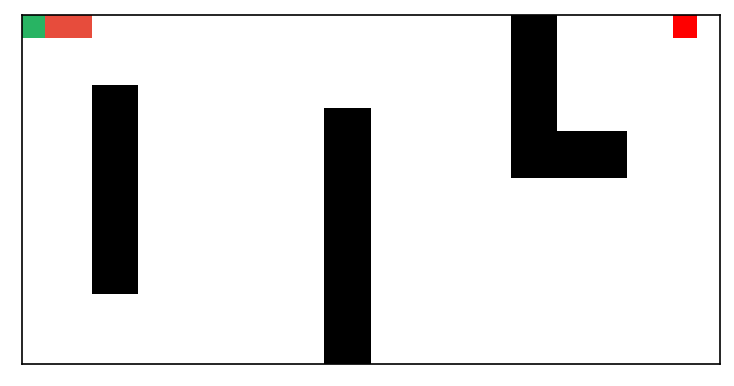

In [29]:
for n in node:
    print(make_path(n))
    draw(test_map, Node(starts_points[0][0], starts_points[0][1]), Node(goals_points[0][0], goals_points[0][1]), make_path(n)[0])